**EStimation of food delivery time**

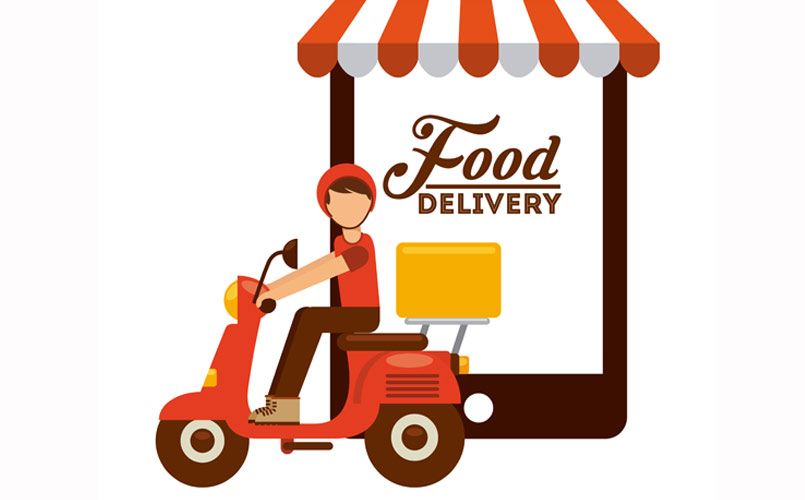

**Project Steps:**

* Understanding the property estimation features
* Data Collection for features
* Data Validation & Cleaning
* Insights on Data (EDA)
* **Predictive Modeling Steps:**
    - Input(x) and Output(y) columns identification for predictive modeling
    - Feature engineering on x data (selecting important input features for modeling)
    - Dividing X, y data into training data (xtrain, ytrain) and testing data (xtest, ytest)
    - Handling missing values & outliers on xtrain, xtest data
    - Data Pre-Processing on xtrain and xtest data
        - converting categorical data into label encoding/onehot encoding
        - applying scaling on numerical data if necessary
    - Selecting predictive model algorithms based on y data type
    - Importing algorithm library and define model
    - Training model with xtrain , ytrain data
    - Testing model on xtest
        - get predictions(ypred) on xtest with trained model
    - Compare ypred with ytest values to check model performance
        - loss
        - performance
    - Check for different models with different algorithms
    - Select best model with less loss and high performance
    - Get real time predictions on unknowndata(xunknown) with best model

**1. Understanding The Food delivery time Prediction(Business Understanding)**

* To Estimate a food delivery time there will be serveral factors which will include,
    - Distance, Delivery_person_ratings, weather conditions
        - when the distance increases time also increases

**2. Data Collection for the Identified Features along with some other features**

* Data Collected through Kaggle 
* reference site-https://www.kaggle.com/datasets/bhanupratapbiswas/food-delivery-time-prediction-case-study

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Importing data set**

In [2]:
data=pd.read_csv(r"F:\DS_working\Datasets\train.csv")

**Basic checks**

In [3]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [4]:
data.shape

(45593, 20)

**feautures\Columns info**

variable|variable info
--------|------------
ID|Order ID
Delivery_person_ID|Develiery Persons ID
Delivery_person_Age|Delivery persons age
Delivery_person_Ratings|ratings of the delivery person
Restaurant_latitude|latitude location of the restaurant
Restaurant_longitude|longitude location of the restaurent
Delivery_location_latitude|latitude location of the delivery
delivery_Location_longitude|longitude location of the delivery
Order_Date|Date at which order placed
Time_Orderd|Time of the order
Time_Order_Picked|Time at which order picked up from the restaurant for delivery
Weatherconditions|condition of thr weather at the time of delivery
Road_traffic_density|Traffic density at the time of delivery
Vechile_condition|Condition of the vechile
Type_of_order|Type of the item odered
Type_of_vechile| Vechile type
multiple_deliveries|number of multiple deliveries 
Festival|festival on that particular day
City|Type of city
Time_taken(min)|time taken to delivery


In [5]:
for i in data.columns:
    try:
        data[i]=data[i].str.lower()
    except:
        continue

In [6]:
data.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
45588,0x7c09,japres04del01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions windy,high,1,meal,motorcycle,0,no,metropolitian,(min) 32
45589,0xd641,agrres16del01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions windy,jam,0,buffet,motorcycle,1,no,metropolitian,(min) 36
45590,0x4f8d,chenres08del03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions cloudy,low,1,drinks,scooter,0,no,metropolitian,(min) 16
45591,0x5eee,coimbres11del01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions cloudy,high,0,snack,motorcycle,1,no,metropolitian,(min) 26
45592,0x5fb2,ranchires09del02,23,4.9,23.351058,85.325731,23.431058,85.405731,02-03-2022,17:10:00,17:15:00,conditions fog,medium,2,snack,scooter,1,no,metropolitian,(min) 36


In [7]:
data.Restaurant_latitude.nunique(),data.Restaurant_longitude.nunique()

(657, 518)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [9]:
data.Restaurant_latitude.unique()

array([ 22.745049,  12.913041,  12.914264,  11.003669,  12.972793,
        17.431668,  23.369746,  12.352058,  17.433809,  30.327968,
        10.003064,  18.56245 ,  30.899584,  26.463504,  19.176269,
        12.311072,  18.592718,  17.426228,  22.552672,  18.563934,
        23.357804,  12.986047,  19.221315,  13.005801,  26.849596,
        21.160522,  12.934179,  18.51421 ,  11.022477,  21.160437,
        15.51315 ,  15.561295,   0.      ,  18.55144 ,  18.593481,
        21.173343,  17.451976,  12.972532,  13.064181,  19.121999,
        21.149569,  19.091458,  22.539129,  12.970324,  21.175975,
        11.003681,  10.96185 ,  27.165108,  26.88842 ,  26.913987,
        12.3085  ,  21.183434,  19.254567,  25.449659,  30.372202,
        21.157735,  21.186438,  12.935662,  17.431477,  12.933298,
        22.311358,  12.934365,  13.086438,  26.913483,  17.411028,
        18.516216,  15.5696  ,  19.876428,  12.939496,  23.374878,
       -27.163303,  22.74806 ,  26.891191,  12.316967,  18.927

In [10]:
data.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [11]:
data[data.duplicated()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)


In [12]:

data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

**Data Validation**

Analyzing each column and converting them into proper data type

In [13]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,indores13del02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions sunny,high,2,snack,motorcycle,0,no,urban,(min) 24
1,0xb379,bangres18del02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions stormy,jam,2,snack,scooter,1,no,metropolitian,(min) 33
2,0x5d6d,bangres19del01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions sandstorms,low,0,drinks,motorcycle,1,no,urban,(min) 26
3,0x7a6a,coimbres13del02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions sunny,medium,0,buffet,motorcycle,1,no,metropolitian,(min) 21
4,0x70a2,chenres12del01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions cloudy,high,1,snack,scooter,1,no,metropolitian,(min) 30


ID , Delivery_person_ID

Dropping ID, Delivery_person_ID as they are not required for the data

In [14]:
data.drop(["ID",'Delivery_person_ID'],axis=1,inplace=True)


In [15]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions sunny,high,2,snack,motorcycle,0,no,urban,(min) 24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions stormy,jam,2,snack,scooter,1,no,metropolitian,(min) 33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions sandstorms,low,0,drinks,motorcycle,1,no,urban,(min) 26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions sunny,medium,0,buffet,motorcycle,1,no,metropolitian,(min) 21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions cloudy,high,1,snack,scooter,1,no,metropolitian,(min) 30


Delivery Person Age

In [16]:
data['Delivery_person_Age']=data['Delivery_person_Age'].astype(float)

In [17]:
data['Delivery_person_Age'].unique()

array([37., 34., 23., 38., 32., 22., 33., 35., 36., 21., 24., 29., 25.,
       31., 27., 26., 20., nan, 28., 39., 30., 15., 50.])

Delivery_person_Ratings	

In [18]:
data['Delivery_person_Ratings'].unique(),data['Delivery_person_Ratings'].nunique(),data['Delivery_person_Ratings'].dtype

(array(['4.9', '4.5', '4.4', '4.7', '4.6', '4.8', '4.2', '4.3', '4', '4.1',
        '5', '3.5', 'nan ', '3.8', '3.9', '3.7', '2.6', '2.5', '3.6',
        '3.1', '2.7', '1', '3.2', '3.3', '6', '3.4', '2.8', '2.9', '3'],
       dtype=object),
 29,
 dtype('O'))

In [19]:
data['Delivery_person_Ratings']=data['Delivery_person_Ratings'].astype(float)

In [20]:
data['Delivery_person_Ratings'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, nan,
       3.8, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4,
       2.8, 2.9, 3. ])

Ordered date

In [21]:
data['Order_Date']=pd.to_datetime(data['Order_Date'])

In [22]:
data['Order_Date']

0       2022-03-19
1       2022-03-25
2       2022-03-19
3       2022-05-04
4       2022-03-26
           ...    
45588   2022-03-24
45589   2022-02-16
45590   2022-11-03
45591   2022-07-03
45592   2022-02-03
Name: Order_Date, Length: 45593, dtype: datetime64[ns]

* creating a column of weekday from orderdate

In [23]:
import datetime
data['weekday']=pd.Series(data['Order_Date']).dt.day_name()

In [24]:
data['weekday']

0         Saturday
1           Friday
2         Saturday
3        Wednesday
4         Saturday
           ...    
45588     Thursday
45589    Wednesday
45590     Thursday
45591       Sunday
45592     Thursday
Name: weekday, Length: 45593, dtype: object

In [25]:
for i in range(len(data)):
    if data['weekday'][i]=='Sunday' or data['weekday'][i]=='Saturday':
        data['weekday'][i]='week_end'
    else:
        data['weekday'][i]='week_day'

In [26]:
data['weekday'].unique()


array(['week_end', 'week_day'], dtype=object)

In [27]:
data.drop(['Order_Date'],axis=1,inplace=True)

Time_Orderd

In [28]:
data['Time_Orderd'].unique(),data['Time_Orderd'].nunique(),data['Time_Orderd'].dtype

(array(['11:30:00', '19:45:00', '08:30:00', '18:00:00', '13:30:00',
        '21:20:00', '19:15:00', '17:25:00', '20:55:00', '21:55:00',
        '14:55:00', '17:30:00', '09:20:00', '19:50:00', '20:25:00',
        '20:30:00', '20:40:00', '21:15:00', '20:20:00', '22:30:00',
        '08:15:00', '19:30:00', '12:25:00', '18:35:00', '20:35:00',
        '23:20:00', '23:35:00', '22:35:00', '23:25:00', '13:35:00',
        '21:35:00', '18:55:00', '14:15:00', '11:00:00', '09:45:00',
        '08:40:00', '23:00:00', 'nan ', '19:10:00', '10:55:00', '21:40:00',
        '19:00:00', '16:45:00', '15:10:00', '22:45:00', '22:10:00',
        '20:45:00', '22:50:00', '17:55:00', '09:25:00', '20:15:00',
        '22:25:00', '22:40:00', '23:50:00', '15:25:00', '10:20:00',
        '10:40:00', '15:55:00', '20:10:00', '12:10:00', '15:30:00',
        '10:35:00', '21:10:00', '20:50:00', '12:35:00', '21:00:00',
        '23:40:00', '18:15:00', '18:20:00', '11:45:00', '12:45:00',
        '23:30:00', '10:50:00', '21:25:0

In [29]:
data['Time_Orderd']=data['Time_Orderd'].replace("nan ",np.nan)


In [30]:
data['Time_Orderd'].isnull().sum()

1731

Time_Order_picked

In [31]:
data['Time_Order_picked'].unique(), data['Time_Order_picked'].nunique(),data['Time_Order_picked'].dtype

(array(['11:45:00', '19:50:00', '08:45:00', '18:10:00', '13:45:00',
        '21:30:00', '19:30:00', '17:30:00', '21:05:00', '22:10:00',
        '15:05:00', '17:40:00', '09:30:00', '20:05:00', '20:35:00',
        '15:10:00', '20:40:00', '20:50:00', '20:25:00', '22:45:00',
        '08:30:00', '19:45:00', '12:30:00', '18:50:00', '23:30:00',
        '21:35:00', '23:45:00', '22:50:00', '22:40:00', '23:35:00',
        '13:40:00', '21:45:00', '19:10:00', '14:25:00', '11:10:00',
        '09:55:00', '08:55:00', '23:10:00', '18:35:00', '19:25:00',
        '11:00:00', '19:15:00', '16:55:00', '11:40:00', '15:15:00',
        '22:55:00', '22:25:00', '20:55:00', '23:05:00', '18:00:00',
        '23:00:00', '09:40:00', '20:20:00', '22:35:00', '22:00:00',
        '23:55:00', '15:40:00', '10:30:00', '21:00:00', '10:50:00',
        '16:05:00', '20:15:00', '12:15:00', '15:45:00', '22:15:00',
        '10:45:00', '15:30:00', '00:05:00', '21:25:00', '12:45:00',
        '21:15:00', '18:20:00', '18:25:00', '11:

* creating a column pickuptime- min to pickup a order, from time_order and time_order_pickup column

In [32]:
pickuptime = []

for i in range(len(data)):
    try:
        val =pd.to_timedelta(data.Time_Order_picked[i]).seconds - pd.to_timedelta(data.Time_Orderd[i]).seconds
        if val<0:
            val = 86400+val
        time = val/60
#         if time<0:
#             time = 1440+time
        pickuptime.append(time)
    except:
        pickuptime.append(np.nan)

In [33]:
data['pickuptime(min)']=pickuptime

In [34]:
data['pickuptime(min)'].unique()

array([15.,  5., 10., nan])

* Dropping Time_order_pickup

In [35]:
data.drop('Time_Order_picked',axis=1,inplace=True)

 * Replacing time_ordered with time at which order placed

    * Here the min value is 0 and the max is 23 that means , hours are from midnight 12 upto 24 hours.
    * We will convert this into categorical , by using classes
    * 3-6 is earlymorning
    * 7-11 is morning
    * 11-15 is afternoon
    * 16-19 is evening
    * 20-22 is night
    * 23-2 is midnight

In [36]:
data['Time_Orderd']=pd.to_timedelta(data['Time_Orderd'])

In [37]:
data['Time_Orderd']=data['Time_Orderd'].dt.components['hours']

In [38]:
l=[]
for i in range(len(data)):
    try:
        if data['Time_Orderd'][i]>=3.0 and data['Time_Orderd'][i]<=6.0:
            l.append('early_morning')
        elif data['Time_Orderd'][i]>=7.0 and data['Time_Orderd'][i]<=11.0:
            l.append('morning')
        elif data['Time_Orderd'][i]>=12.0 and data['Time_Orderd'][i]<=15.0:
            l.append('afternoon')
        elif data['Time_Orderd'][i]>=16.0 and data['Time_Orderd'][i]<=19.0:
            l.append('evening')        
        elif data['Time_Orderd'][i]>=20.0 and data['Time_Orderd'][i]<=22.0:
            l.append('night') 
        elif data['Time_Orderd'][i]==23.0:
            l.append('midnight')
        elif data['Time_Orderd'][i]<=2.0:
            l.append("midnight")
        else:
            l.append(np.nan)
    except:
        continue

In [39]:
data['Time_Orderd']=l

In [40]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),weekday,pickuptime(min)
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,morning,conditions sunny,high,2,snack,motorcycle,0,no,urban,(min) 24,week_end,15.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,evening,conditions stormy,jam,2,snack,scooter,1,no,metropolitian,(min) 33,week_day,5.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,morning,conditions sandstorms,low,0,drinks,motorcycle,1,no,urban,(min) 26,week_end,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,evening,conditions sunny,medium,0,buffet,motorcycle,1,no,metropolitian,(min) 21,week_day,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,afternoon,conditions cloudy,high,1,snack,scooter,1,no,metropolitian,(min) 30,week_end,15.0


Weatherconditions	

In [41]:
data['Weatherconditions'].unique(),data['Weatherconditions'].nunique()

(array(['conditions sunny', 'conditions stormy', 'conditions sandstorms',
        'conditions cloudy', 'conditions fog', 'conditions windy',
        'conditions nan'], dtype=object),
 7)

In [42]:
for i in range(len(data)):
    data['Weatherconditions'][i]=data['Weatherconditions'][i].split()[1]

In [43]:
data['Weatherconditions']=data['Weatherconditions'].replace("NaN",np.nan)


In [44]:
data['Weatherconditions'].unique()

array(['sunny', 'stormy', 'sandstorms', 'cloudy', 'fog', 'windy', 'nan'],
      dtype=object)

Road_traffic_density

In [45]:
data['Road_traffic_density'].unique(),data['Road_traffic_density'].nunique()

(array(['high ', 'jam ', 'low ', 'medium ', 'nan '], dtype=object), 5)

In [46]:
data['Road_traffic_density']=data['Road_traffic_density'].replace("nan ",np.nan)

In [47]:
for i in range(len(data)):
    try:
        
        data['Road_traffic_density'][i]=data['Road_traffic_density'][i].split()[0]
    except:
        continue

multiple_deliveries

In [48]:
data['multiple_deliveries'].unique()

array(['0', '1', '3', 'nan ', '2'], dtype=object)

In [49]:
data['multiple_deliveries']=data['multiple_deliveries'].replace("nan ",np.nan)

In [50]:
data['multiple_deliveries']=data['multiple_deliveries'].astype(float)


Festival	


In [51]:
data['Festival'].unique()

array(['no ', 'yes ', 'nan '], dtype=object)

In [52]:
data['multiple_deliveries']

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
45588    0.0
45589    1.0
45590    0.0
45591    1.0
45592    1.0
Name: multiple_deliveries, Length: 45593, dtype: float64

In [53]:
for i in range(len(data)):
    try:
        
        data['Festival'][i]=data['Festival'][i].split()[0]
    except:
        continue

In [54]:
data['Festival'].unique()

array(['no', 'yes', 'nan'], dtype=object)

In [55]:
data['Festival']=data['Festival'].replace("nan",np.nan)


City

In [56]:
data['City'].unique()

array(['urban ', 'metropolitian ', 'semi-urban ', 'nan '], dtype=object)

In [57]:
data['City']=data['City'].replace("nan ",np.nan)


In [58]:
for i in range(len(data)):
    try:
        
        data['City'][i]=data['City'][i].split()[0]
    except:
        continue

In [59]:
data['City'].unique()

array(['urban', 'metropolitian', 'semi-urban', nan], dtype=object)

Time_taken(min)

In [60]:
for i in range(len(data)):
    try:
        data['Time_taken(min)'][i]=data['Time_taken(min)'][i].split()[1]
    except:
        continue

In [61]:
data['Time_taken(min)'].unique()

array(['24', '33', '26', '21', '30', '40', '32', '34', '46', '23', '20',
       '41', '15', '36', '39', '18', '38', '47', '12', '22', '25', '35',
       '10', '19', '11', '28', '52', '16', '27', '49', '17', '14', '37',
       '44', '42', '31', '13', '29', '50', '43', '48', '54', '53', '45',
       '51'], dtype=object)

In [62]:
data['Time_taken(min)']=data['Time_taken(min)'].astype(float)

In [63]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),weekday,pickuptime(min)
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,morning,sunny,high,2,snack,motorcycle,0.0,no,urban,24.0,week_end,15.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,evening,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33.0,week_day,5.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,morning,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26.0,week_end,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,evening,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21.0,week_day,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,afternoon,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30.0,week_end,15.0


**calculating distance between Two latitudes and longitudes**

This dataset doesn't show any distance between restaurant and delivery location. We just have longitude and latitude points of retaurent and the delivery location . hence we can use **Haversine formula**  to calculate distance between two locations based on their lattitudes and longitudes.

In [64]:
# set earth radius in km
R=6371

# convert degrees to radiance
def deg_to_rad(degrees):
    return degrees*(np.pi/180)

# function to calculate distance between two points using haversine formula
def distcal(lat1,lon1,lat2,lon2):
    d_lat=deg_to_rad(np.abs(lat2)-np.abs(lat1))
    d_lon=deg_to_rad(np.abs(lon2)-np.abs(lon1))
    a=np.sin(d_lat/2)**2+np.cos(deg_to_rad(np.abs(lat1)))*np.cos(deg_to_rad(np.abs(lon2)))*np.sin(d_lon/2)**2
    c=2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    return R*c

In [65]:
data['distance']=np.nan
for i in range(len(data)):
    data.loc[i,'distance']=distcal(data.loc[i,'Restaurant_latitude'],data.loc[i,'Restaurant_longitude'],data.loc[i,'Delivery_location_latitude'],data.loc[i,'Delivery_location_longitude'])

In [66]:
data=data.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'],axis=1)

In [67]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),weekday,pickuptime(min),distance
0,37.0,4.9,morning,sunny,high,2,snack,motorcycle,0.0,no,urban,24.0,week_end,15.0,2.460878
1,34.0,4.5,evening,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33.0,week_day,5.0,15.872994
2,23.0,4.4,morning,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26.0,week_end,15.0,1.222049
3,38.0,4.7,evening,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21.0,week_day,10.0,6.141879
4,32.0,4.6,afternoon,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30.0,week_end,15.0,4.799412


In [68]:
data['distance'].describe()

count    45593.000000
mean         7.958449
std          4.638799
min          1.125809
25%          3.758064
50%          7.406385
75%         11.045067
max         20.442930
Name: distance, dtype: float64

In [69]:
data.isnull().sum()

Delivery_person_Age        1854
Delivery_person_Ratings    1908
Time_Orderd                1731
Weatherconditions             0
Road_traffic_density        601
Vehicle_condition             0
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries         993
Festival                    228
City                       1200
Time_taken(min)               0
weekday                       0
pickuptime(min)            1731
distance                      0
dtype: int64

**Exploratory Data Analysis**

In [70]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),weekday,pickuptime(min),distance
0,37.0,4.9,morning,sunny,high,2,snack,motorcycle,0.0,no,urban,24.0,week_end,15.0,2.460878
1,34.0,4.5,evening,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33.0,week_day,5.0,15.872994
2,23.0,4.4,morning,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26.0,week_end,15.0,1.222049
3,38.0,4.7,evening,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21.0,week_day,10.0,6.141879
4,32.0,4.6,afternoon,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30.0,week_end,15.0,4.799412


UNI VARIATE ANALYSIS



Numerical Column: Delivery_person_Age
Uni-Variate Descriptive Stats:
count    43739.0
mean        30.0
std          6.0
min         15.0
25%         25.0
50%         30.0
75%         35.0
max         50.0
Name: Delivery_person_Age, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.01866933501009544 , -1.058332619421362

Visual Analysis:
-----------------------------------------------------


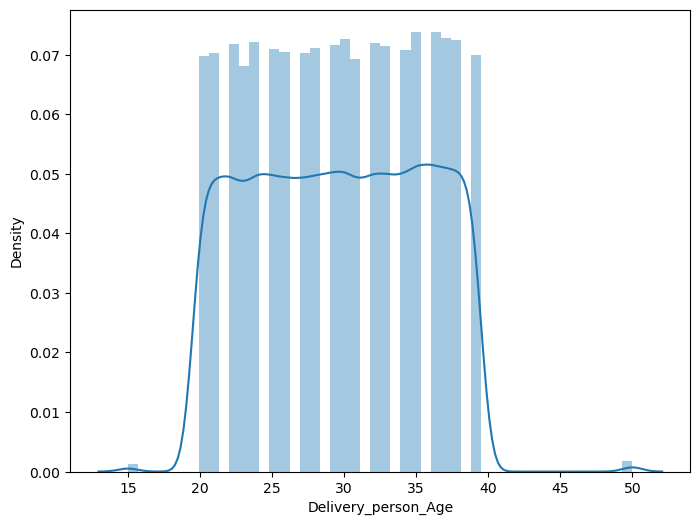


Numerical Column: Delivery_person_Ratings
Uni-Variate Descriptive Stats:
count    43685.0
mean         5.0
std          0.0
min          1.0
25%          4.0
50%          5.0
75%          5.0
max          6.0
Name: Delivery_person_Ratings, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: -2.4935515971807916 , 15.670704523844856

Visual Analysis:
-----------------------------------------------------


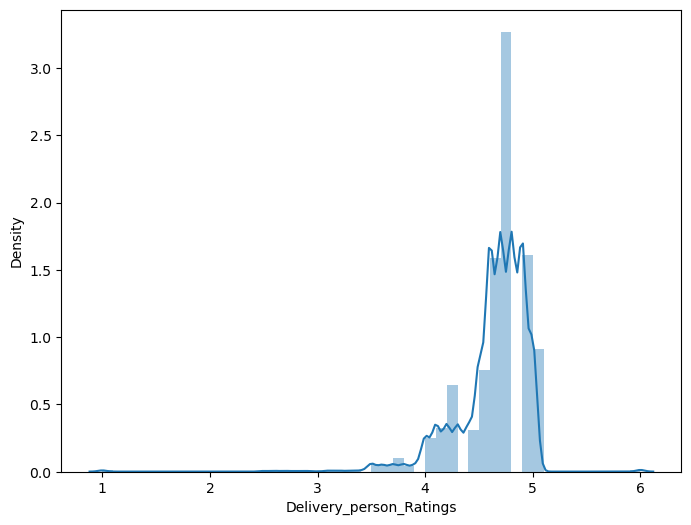


Categorical Column: Time_Orderd
Uni-Variate Descriptive Stats:
Classes: ['morning' 'evening' 'afternoon' 'night' 'midnight' nan]
Number of Classes: 5
Class Percent:
evening      32.059642
night        31.464593
morning      17.596097
midnight     11.264876
afternoon     7.614792
Name: Time_Orderd, dtype: float64
---------------------------------------------------
Mode Value: evening

Visual Analysis:
-----------------------------------------------------


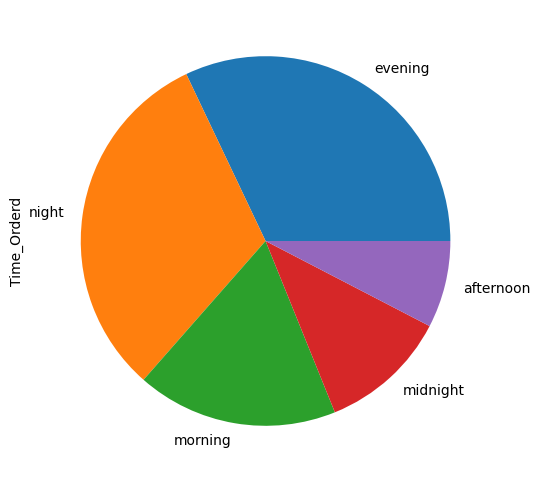


Categorical Column: Weatherconditions
Uni-Variate Descriptive Stats:
Classes: ['sunny' 'stormy' 'sandstorms' 'cloudy' 'fog' 'windy' 'nan']
Number of Classes: 7
Class Percent:
fog           16.787665
stormy        16.638519
cloudy        16.528853
sandstorms    16.438927
windy         16.278815
sunny         15.976137
nan            1.351085
Name: Weatherconditions, dtype: float64
---------------------------------------------------
Mode Value: fog

Visual Analysis:
-----------------------------------------------------


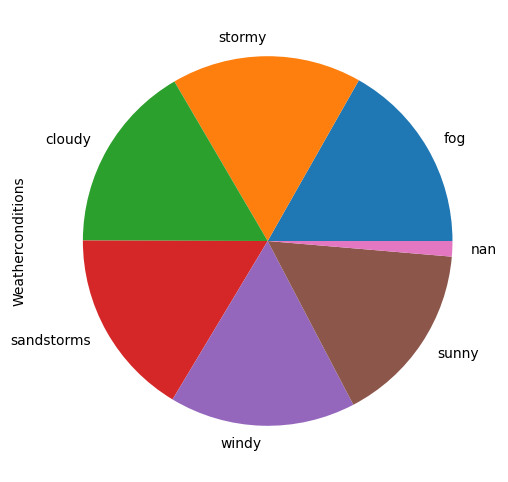


Categorical Column: Road_traffic_density
Uni-Variate Descriptive Stats:
Classes: ['high' 'jam' 'low' 'medium' nan]
Number of Classes: 4
Class Percent:
low       34.399449
jam       31.434477
medium    24.330992
high       9.835082
Name: Road_traffic_density, dtype: float64
---------------------------------------------------
Mode Value: low

Visual Analysis:
-----------------------------------------------------


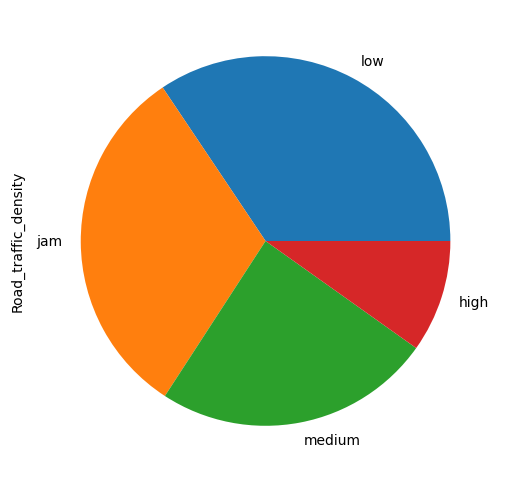


Numerical Column: Vehicle_condition
Uni-Variate Descriptive Stats:
count    45593.0
mean         1.0
std          1.0
min          0.0
25%          0.0
50%          1.0
75%          2.0
max          3.0
Name: Vehicle_condition, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.07185315271533156 , -1.3150016518542282

Visual Analysis:
-----------------------------------------------------


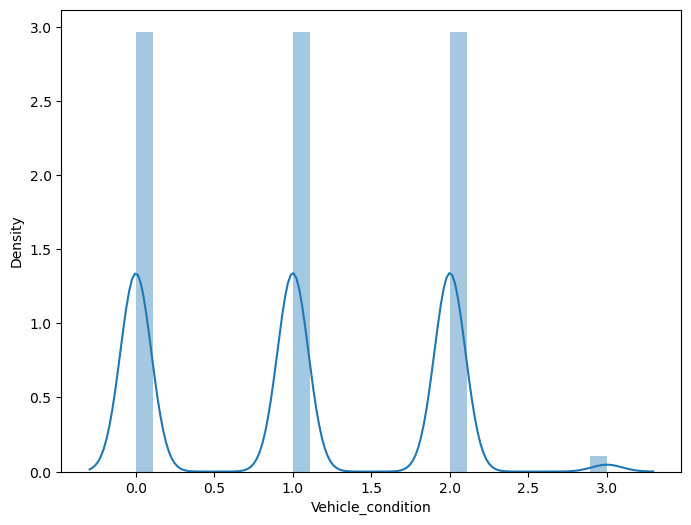


Categorical Column: Type_of_order
Uni-Variate Descriptive Stats:
Classes: ['snack ' 'drinks ' 'buffet ' 'meal ']
Number of Classes: 4
Class Percent:
snack      25.295550
meal       25.131051
drinks     24.832759
buffet     24.740640
Name: Type_of_order, dtype: float64
---------------------------------------------------
Mode Value: snack 

Visual Analysis:
-----------------------------------------------------


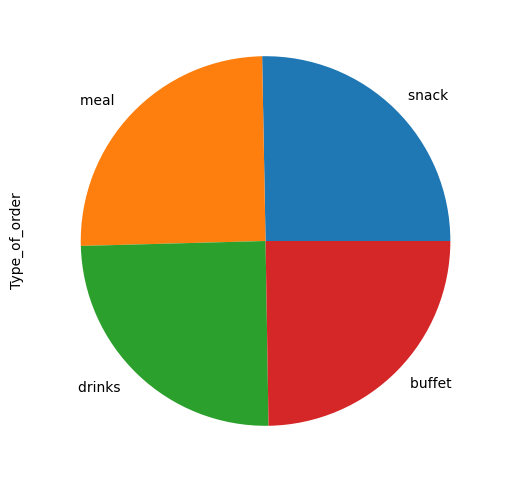


Categorical Column: Type_of_vehicle
Uni-Variate Descriptive Stats:
Classes: ['motorcycle ' 'scooter ' 'electric_scooter ' 'bicycle ']
Number of Classes: 4
Class Percent:
motorcycle           57.980392
scooter              33.505143
electric_scooter      8.365319
bicycle               0.149146
Name: Type_of_vehicle, dtype: float64
---------------------------------------------------
Mode Value: motorcycle 

Visual Analysis:
-----------------------------------------------------


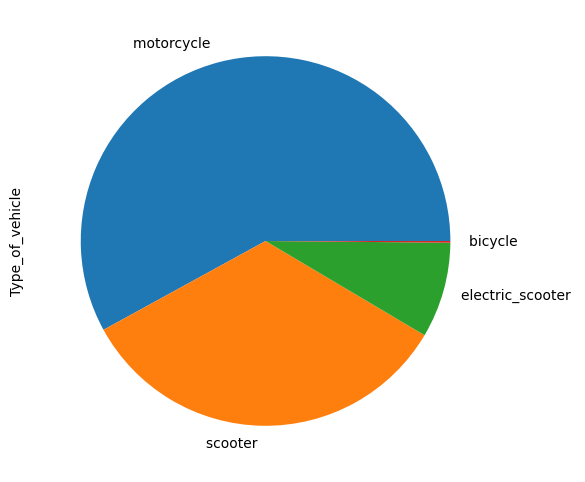


Numerical Column: multiple_deliveries
Uni-Variate Descriptive Stats:
count    44600.0
mean         1.0
std          1.0
min          0.0
25%          0.0
50%          1.0
75%          1.0
max          3.0
Name: multiple_deliveries, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.3246820547839275 , 0.9090971711774505

Visual Analysis:
-----------------------------------------------------


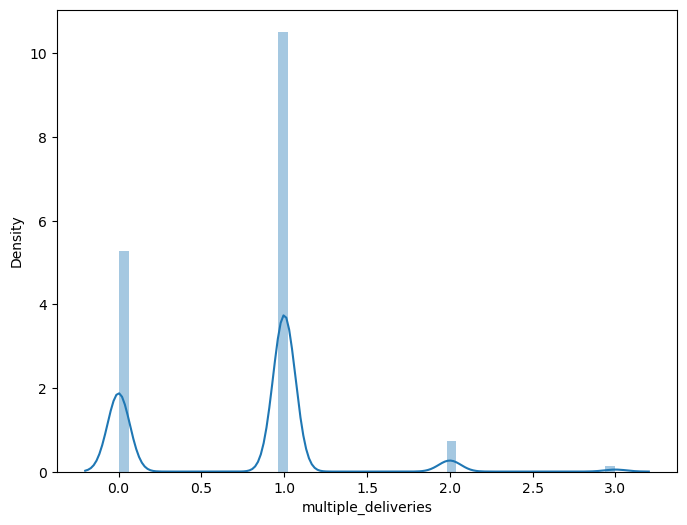


Categorical Column: Festival
Uni-Variate Descriptive Stats:
Classes: ['no' 'yes' nan]
Number of Classes: 2
Class Percent:
no     98.024909
yes     1.975091
Name: Festival, dtype: float64
---------------------------------------------------
Mode Value: no

Visual Analysis:
-----------------------------------------------------


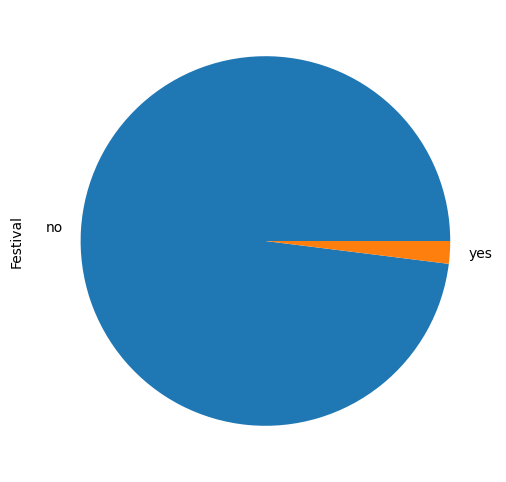


Categorical Column: City
Uni-Variate Descriptive Stats:
Classes: ['urban' 'metropolitian' 'semi-urban' nan]
Number of Classes: 3
Class Percent:
metropolitian    76.798144
urban            22.832429
semi-urban        0.369428
Name: City, dtype: float64
---------------------------------------------------
Mode Value: metropolitian

Visual Analysis:
-----------------------------------------------------


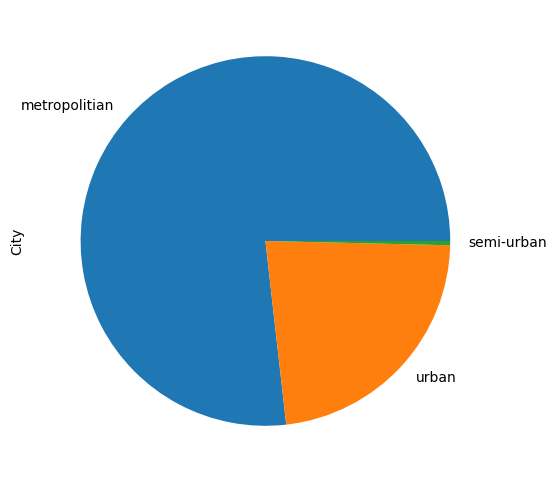


Numerical Column: Time_taken(min)
Uni-Variate Descriptive Stats:
count    45593.0
mean        26.0
std          9.0
min         10.0
25%         19.0
50%         26.0
75%         32.0
max         54.0
Name: Time_taken(min), dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.4859512298743323 , -0.31079786649115215

Visual Analysis:
-----------------------------------------------------


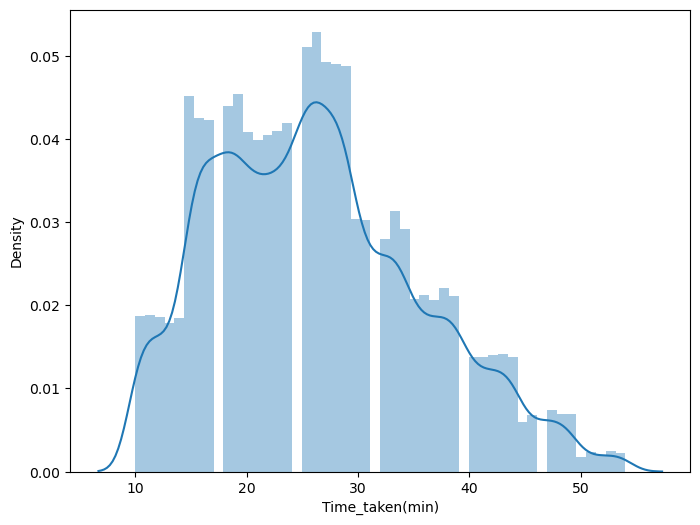


Categorical Column: weekday
Uni-Variate Descriptive Stats:
Classes: ['week_end' 'week_day']
Number of Classes: 2
Class Percent:
week_day    74.515825
week_end    25.484175
Name: weekday, dtype: float64
---------------------------------------------------
Mode Value: week_day

Visual Analysis:
-----------------------------------------------------


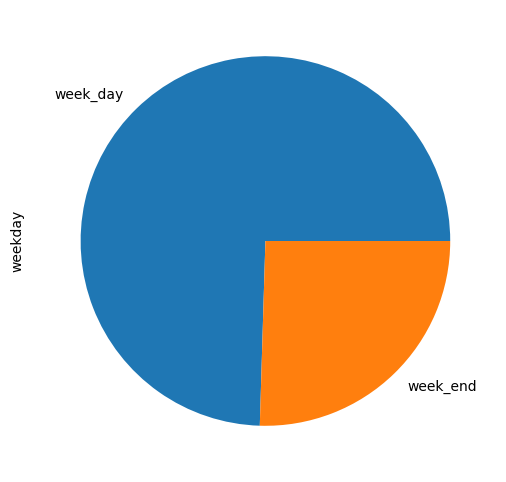


Numerical Column: pickuptime(min)
Uni-Variate Descriptive Stats:
count    43862.0
mean        10.0
std          4.0
min          5.0
25%          5.0
50%         10.0
75%         15.0
max         15.0
Name: pickuptime(min), dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.0039000996865742954 , -1.5036817001373752

Visual Analysis:
-----------------------------------------------------


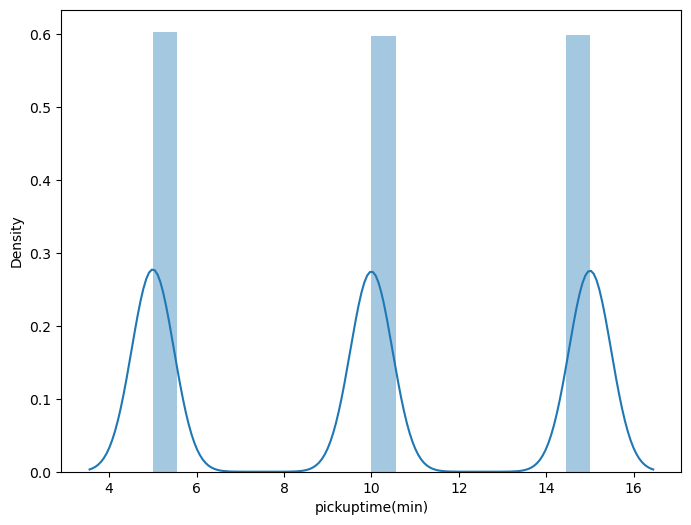


Numerical Column: distance
Uni-Variate Descriptive Stats:
count    45593.0
mean         8.0
std          5.0
min          1.0
25%          4.0
50%          7.0
75%         11.0
max         20.0
Name: distance, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.3875366910928363 , -0.7350569393830373

Visual Analysis:
-----------------------------------------------------


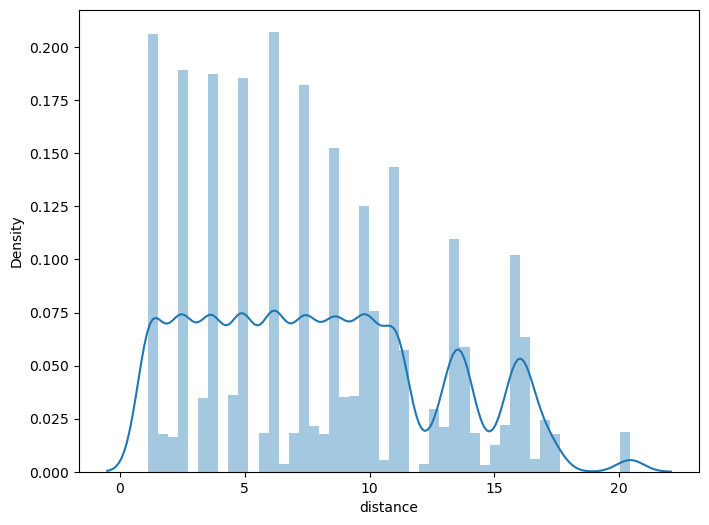

In [71]:
from simple_colors import *

for i in data.columns:
    if data[i].dtype == 'object':
        print()
        print(green("Categorical Column:",['bold']), i)
        print("=====================================================")
        print(green("Uni-Variate Descriptive Stats:",['bold']))
        print(black("Classes:", ['bold']), data[i].unique())
        print(black("Number of Classes:",['bold']), data[i].nunique())
        print(black('Class Percent:',['bold']))
        print((data[i].value_counts()/data[i].value_counts().sum())*100)
        print("---------------------------------------------------")
        print(black("Mode Value:",['bold']), data[i].mode()[0])
        if i!='Amenities_Cleaned' and i!='Flooring':
            print()
            print(magenta("Visual Analysis:",['bold']))
            print("-----------------------------------------------------")
            plt.figure(figsize = (8,6))
            data[i].value_counts().plot(kind = 'pie')
            plt.show()        
        
    elif data[i].dtype != 'object':
        print()
        print(blue("Numerical Column:",['bold']), i)
        print("=====================================================")
        print(green("Uni-Variate Descriptive Stats:",['bold']))
        print(round(data[i].describe(),))
        print("-----------------------------------------------------")
        print(black("Skewness & Kurtosis:",['bold']), data[i].skew(), ",", data[i].kurt())
        print()
        print(cyan("Visual Analysis:",['bold']))
        print("-----------------------------------------------------")
        plt.figure(figsize = (8,6))
        sns.distplot(data[i])
        #data[i].plot(kind = 'density')
        plt.show()

**Uni-Variate Insights**

**Categorical column data insights**

* Most of the Orders are placed in **evening** and **night**.
* Most of the days traffic is **low**.
* Almost every item (Type_of_order) is equally orderd.
* Mostly used vechile by delivery persons is **Motorcycle**.
* Almost 75% of the orders are placed from **Metropolitan**.
* 70% of the orders are placed in **Week_Days**.

**Numerical column Data Insights**

* Average Age of a Delivery Person is **30**.
* Average ratings of a delivery Person is **5**.
* Vechile condition used by Delivery persons are in good condition.
* Almost 75% of the delivery persons does have 1 multiple delivery.
* Average time taken by a delivery person is **26** min.
* Average Pickup time for food pickup at restaurent is **10min**.
* Almost 75% of the orders are within the range of distance of **11km** from the restaurent.

**Bi-Variate Analysis**


Numerical Column v/s Numerical Column
Bi-Variate Analysis
                     Delivery_person_Age  Time_taken(min)
Delivery_person_Age             1.000000         0.299474
Time_taken(min)                 0.299474         1.000000
Visual Analysis
0        37.0
1        34.0
2        23.0
3        38.0
4        32.0
         ... 
45588    30.0
45589    21.0
45590    30.0
45591    20.0
45592    23.0
Name: Delivery_person_Age, Length: 45593, dtype: float64 v/s Time
-------------------------------------------------------------


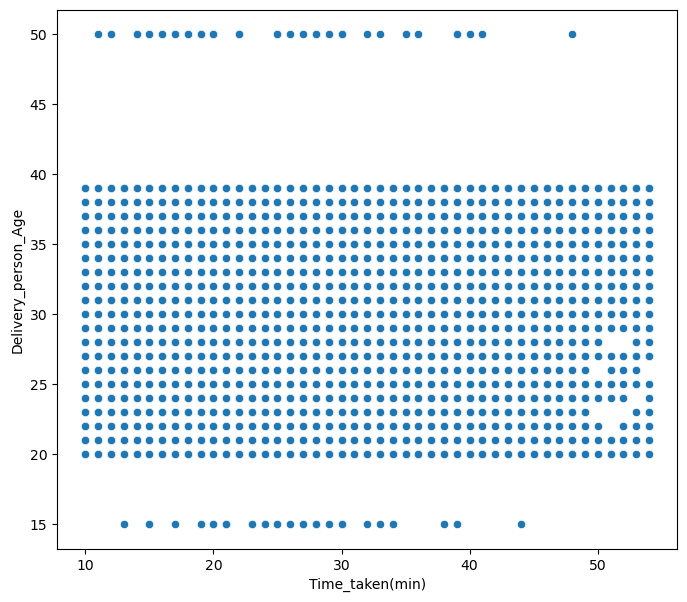


Numerical Column v/s Numerical Column
Bi-Variate Analysis
                         Delivery_person_Ratings  Time_taken(min)
Delivery_person_Ratings                  1.00000         -0.33879
Time_taken(min)                         -0.33879          1.00000
Visual Analysis
0        4.9
1        4.5
2        4.4
3        4.7
4        4.6
        ... 
45588    4.8
45589    4.6
45590    4.9
45591    4.7
45592    4.9
Name: Delivery_person_Ratings, Length: 45593, dtype: float64 v/s Time
-------------------------------------------------------------


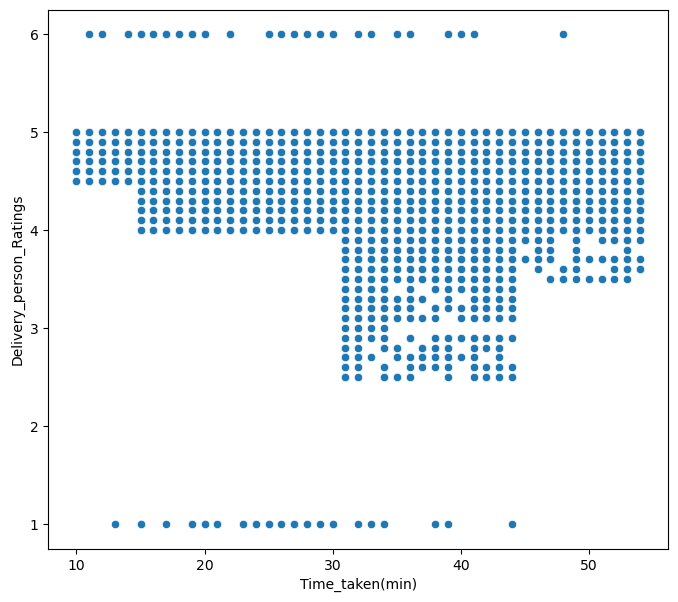


Categorical V/s Numerical
Time_Orderd
afternoon    26.212575
evening      28.255867
midnight     22.425825
morning      21.275460
night        28.505616
Name: Time_taken(min), dtype: float64
Visual Analysis
0          morning
1          evening
2          morning
3          evening
4        afternoon
           ...    
45588      morning
45589      evening
45590     midnight
45591    afternoon
45592      evening
Name: Time_Orderd, Length: 45593, dtype: object v/s Time
-------------------------------------------------------------


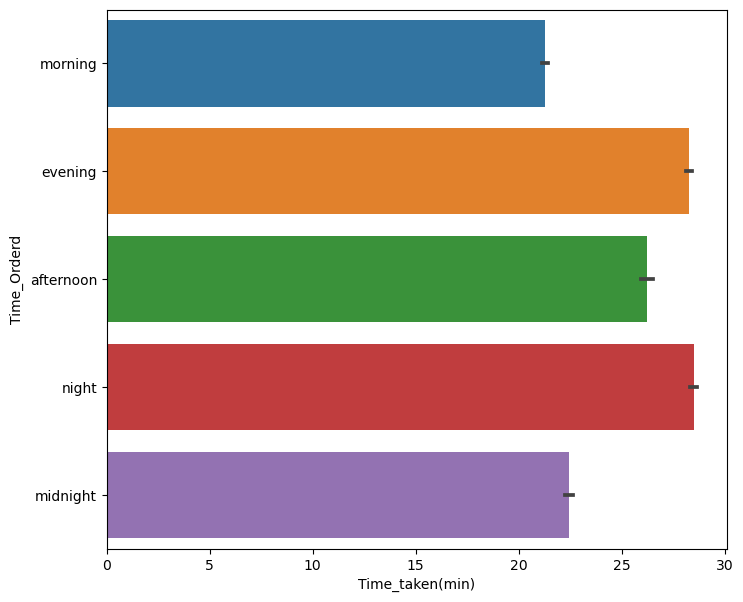


Categorical V/s Numerical
Weatherconditions
cloudy        28.917330
fog           28.916122
nan           26.545455
sandstorms    25.875517
stormy        25.870815
sunny         21.856947
windy         26.118836
Name: Time_taken(min), dtype: float64
Visual Analysis
0             sunny
1            stormy
2        sandstorms
3             sunny
4            cloudy
            ...    
45588         windy
45589         windy
45590        cloudy
45591        cloudy
45592           fog
Name: Weatherconditions, Length: 45593, dtype: object v/s Time
-------------------------------------------------------------


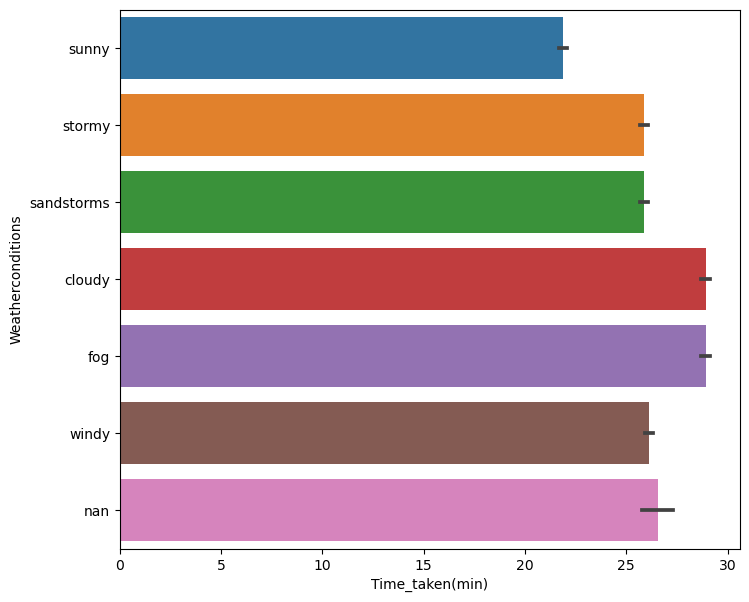


Categorical V/s Numerical
Road_traffic_density
high      27.240000
jam       31.176624
low       21.266977
medium    26.699644
Name: Time_taken(min), dtype: float64
Visual Analysis
0          high
1           jam
2           low
3        medium
4          high
          ...  
45588      high
45589       jam
45590       low
45591      high
45592    medium
Name: Road_traffic_density, Length: 45593, dtype: object v/s Time
-------------------------------------------------------------


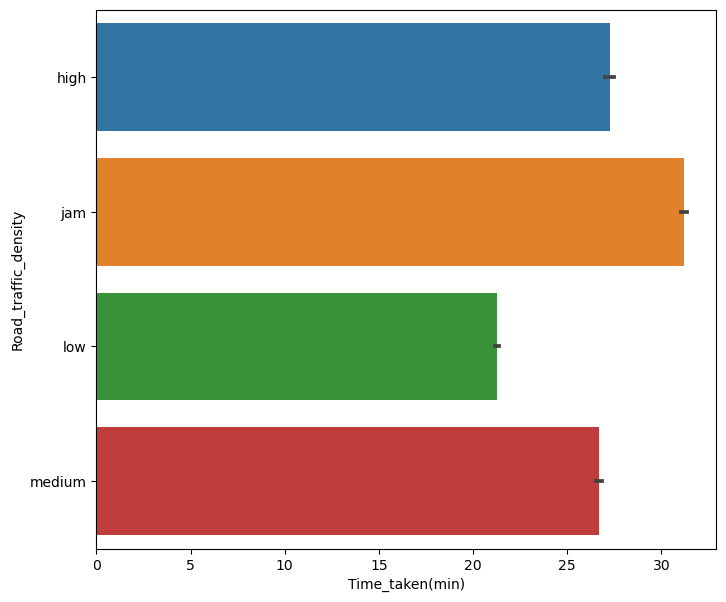


Categorical V/s Numerical
Type_of_order
buffet     26.283511
drinks     26.187953
meal       26.419270
snack      26.286309
Name: Time_taken(min), dtype: float64
Visual Analysis
0         snack 
1         snack 
2        drinks 
3        buffet 
4         snack 
          ...   
45588      meal 
45589    buffet 
45590    drinks 
45591     snack 
45592     snack 
Name: Type_of_order, Length: 45593, dtype: object v/s Time
-------------------------------------------------------------


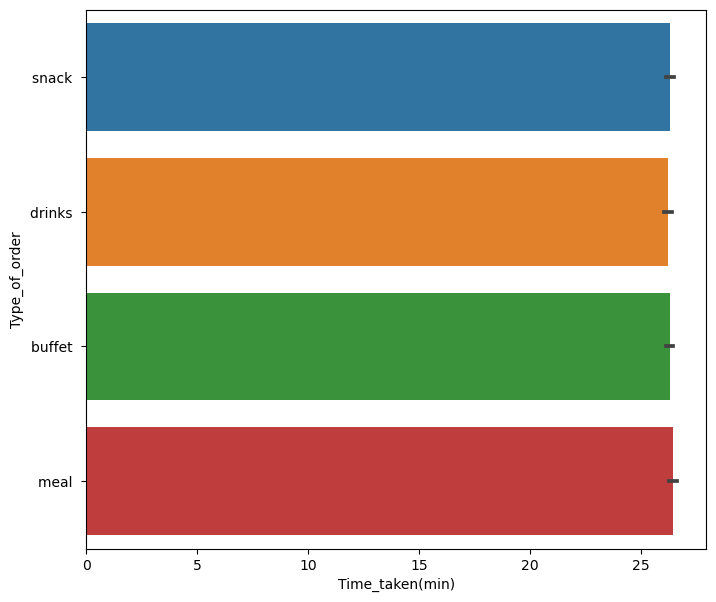


Categorical V/s Numerical
Type_of_vehicle
bicycle              26.426471
electric_scooter     24.470110
motorcycle           27.605674
scooter              24.480754
Name: Time_taken(min), dtype: float64
Visual Analysis
0        motorcycle 
1           scooter 
2        motorcycle 
3        motorcycle 
4           scooter 
            ...     
45588    motorcycle 
45589    motorcycle 
45590       scooter 
45591    motorcycle 
45592       scooter 
Name: Type_of_vehicle, Length: 45593, dtype: object v/s Time
-------------------------------------------------------------


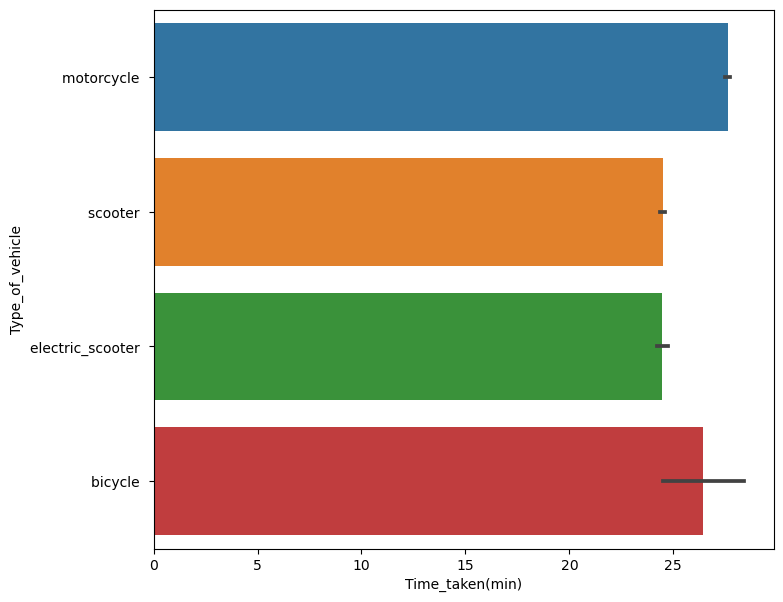


Numerical Column v/s Numerical Column
Bi-Variate Analysis
                     multiple_deliveries  Time_taken(min)
multiple_deliveries             1.000000         0.387051
Time_taken(min)                 0.387051         1.000000
Visual Analysis
0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
45588    0.0
45589    1.0
45590    0.0
45591    1.0
45592    1.0
Name: multiple_deliveries, Length: 45593, dtype: float64 v/s Time
-------------------------------------------------------------


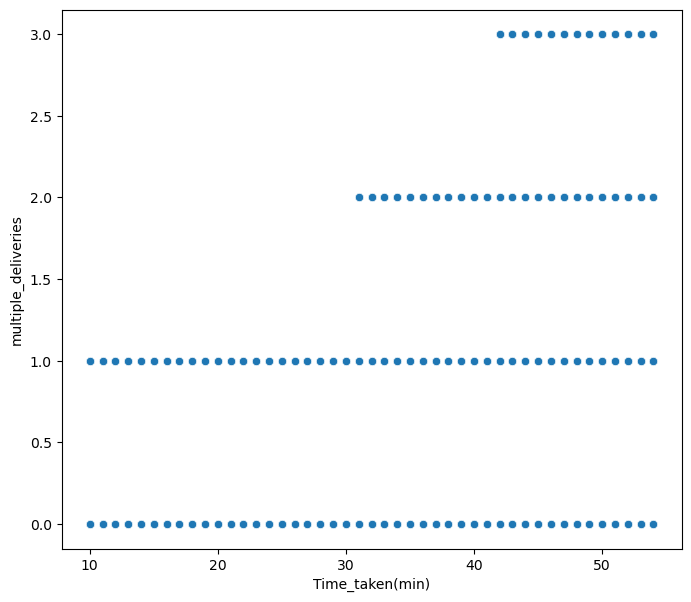


Categorical V/s Numerical
Festival
no     25.984843
yes    45.517857
Name: Time_taken(min), dtype: float64
Visual Analysis
0        no
1        no
2        no
3        no
4        no
         ..
45588    no
45589    no
45590    no
45591    no
45592    no
Name: Festival, Length: 45593, dtype: object v/s Time
-------------------------------------------------------------


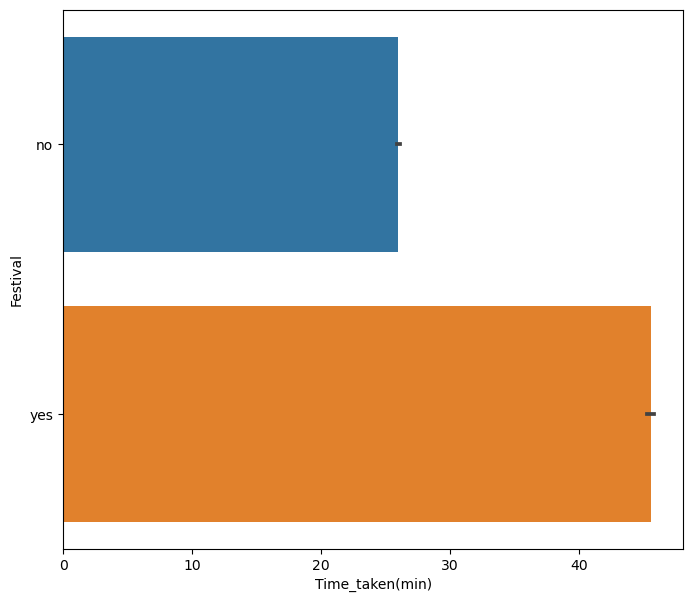


Categorical V/s Numerical
City
metropolitian    27.315226
semi-urban       49.731707
urban            22.984017
Name: Time_taken(min), dtype: float64
Visual Analysis
0                urban
1        metropolitian
2                urban
3        metropolitian
4        metropolitian
             ...      
45588    metropolitian
45589    metropolitian
45590    metropolitian
45591    metropolitian
45592    metropolitian
Name: City, Length: 45593, dtype: object v/s Time
-------------------------------------------------------------


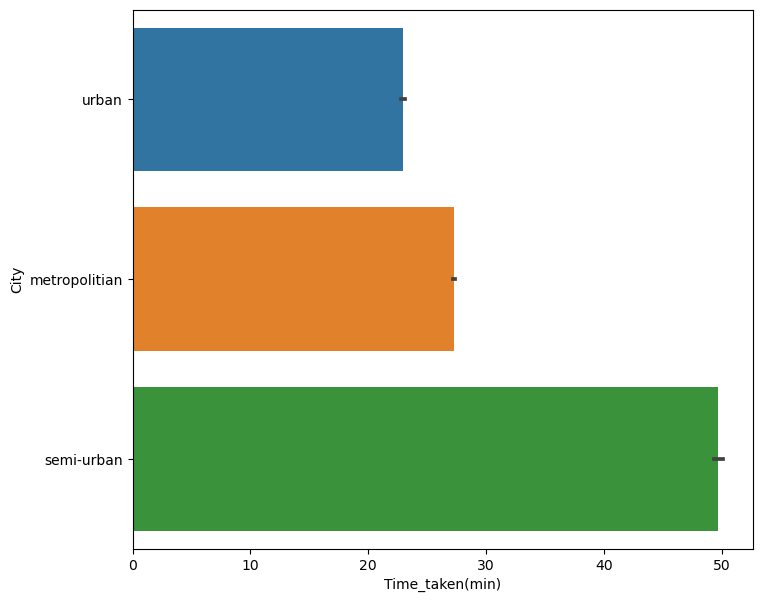


Numerical Column v/s Numerical Column
Bi-Variate Analysis
                 Time_taken(min)  Time_taken(min)
Time_taken(min)              1.0              1.0
Time_taken(min)              1.0              1.0
Visual Analysis
0        24.0
1        33.0
2        26.0
3        21.0
4        30.0
         ... 
45588    32.0
45589    36.0
45590    16.0
45591    26.0
45592    36.0
Name: Time_taken(min), Length: 45593, dtype: float64 v/s Time
-------------------------------------------------------------


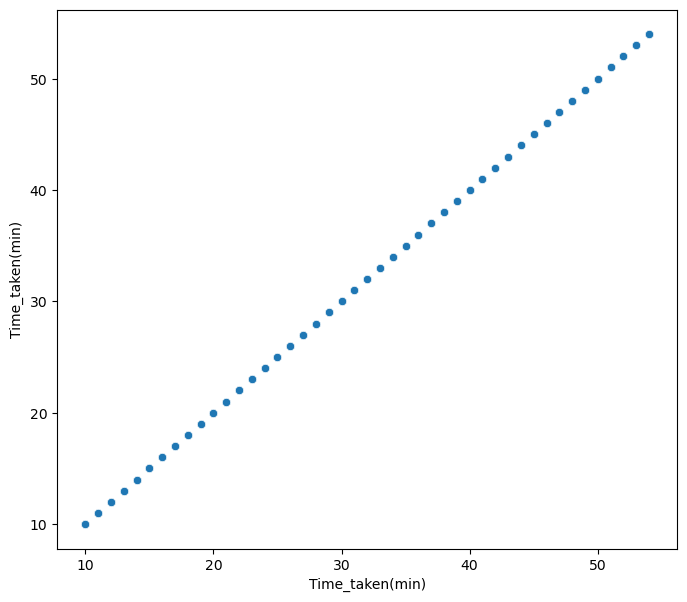


Categorical V/s Numerical
weekday
week_day    26.416171
week_end    25.939151
Name: Time_taken(min), dtype: float64
Visual Analysis
0        week_end
1        week_day
2        week_end
3        week_day
4        week_end
           ...   
45588    week_day
45589    week_day
45590    week_day
45591    week_end
45592    week_day
Name: weekday, Length: 45593, dtype: object v/s Time
-------------------------------------------------------------


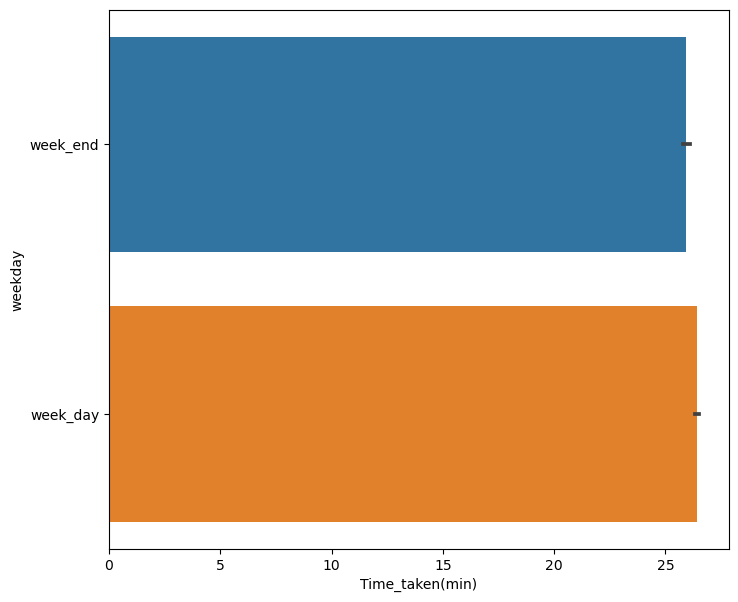


Numerical Column v/s Numerical Column
Bi-Variate Analysis
                 pickuptime(min)  Time_taken(min)
pickuptime(min)         1.000000        -0.008478
Time_taken(min)        -0.008478         1.000000
Visual Analysis
0        15.0
1         5.0
2        15.0
3        10.0
4        15.0
         ... 
45588    10.0
45589    15.0
45590    15.0
45591     5.0
45592     5.0
Name: pickuptime(min), Length: 45593, dtype: float64 v/s Time
-------------------------------------------------------------


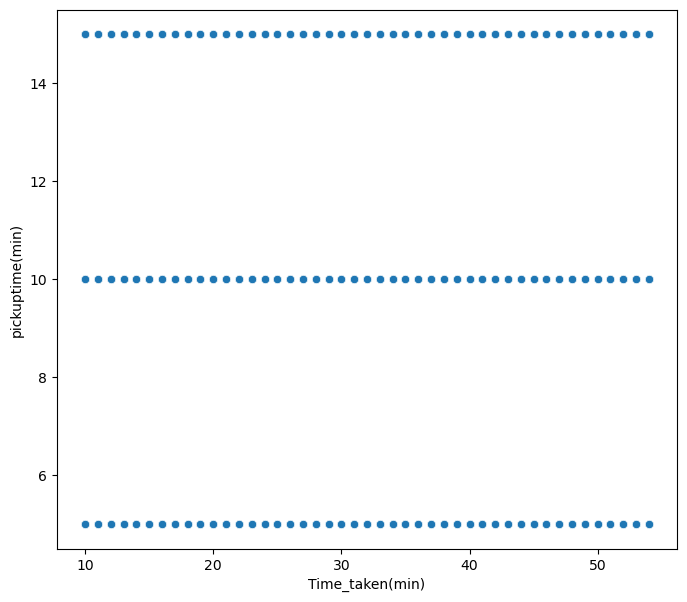


Numerical Column v/s Numerical Column
Bi-Variate Analysis
                 distance  Time_taken(min)
distance         1.000000         0.316981
Time_taken(min)  0.316981         1.000000
Visual Analysis
0         2.460878
1        15.872994
2         1.222049
3         6.141879
4         4.799412
           ...    
45588     1.227531
45589    11.007735
45590     3.599963
45591     4.913515
45592     9.216877
Name: distance, Length: 45593, dtype: float64 v/s Time
-------------------------------------------------------------


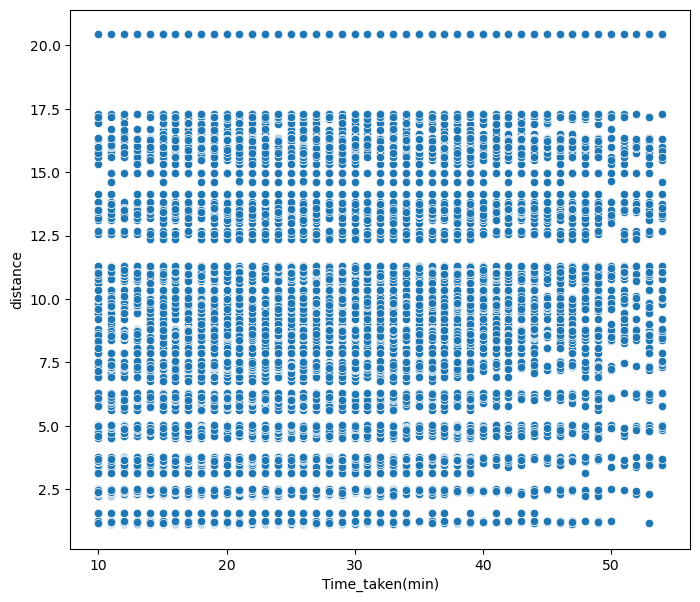

In [72]:
from simple_colors import *


for i in data.columns:
    if data[i].dtype =='int32'or data[i].dtype=='float64':
        print()
        print(blue("Numerical Column v/s Numerical Column",['bold']))
        print("====================================================================")
        print(red("Bi-Variate Analysis",['bold']))
        print(data[[i,'Time_taken(min)']].corr())
        print(black("Visual Analysis",['bold']))
        print("===================================================================")
        plt.figure(figsize=(8,7))
        print(blue("{} v/s Time".format(data[i])))
        print("-------------------------------------------------------------")
        sns.scatterplot(data=data,y=data[i],x='Time_taken(min)')
        plt.show()
    elif data[i].dtype=='object':
        print()
        print(blue("Categorical V/s Numerical",['bold']))
        print(data.groupby(i)['Time_taken(min)'].mean())
        print(black("Visual Analysis",['bold']))
        print("===================================================================")
        plt.figure(figsize=(8,7))
        print(blue("{} v/s Time".format(data[i])))
        print("-------------------------------------------------------------")
        sns.barplot(y=data[i],x='Time_taken(min)',data=data)
        plt.show()
    else:
        continue

**Insights**

* Above 30 age are taking the high time to deliver.
* Persons with High ratings are taking least time to deliver.
* whenever the weather is cloudy or fog -- delivery time is high.
* electric scooter and scotter takes the lowest time to deliver.
* semi-urban takes highest time to deliver.
* Higher the multiple deliveries , higher the deliver time taken.
* afternoon, night and evening times taken high time due to deliver.

**Multi-variate Analysis**

In [73]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),weekday,pickuptime(min),distance
0,37.0,4.9,morning,sunny,high,2,snack,motorcycle,0.0,no,urban,24.0,week_end,15.0,2.460878
1,34.0,4.5,evening,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33.0,week_day,5.0,15.872994
2,23.0,4.4,morning,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26.0,week_end,15.0,1.222049
3,38.0,4.7,evening,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21.0,week_day,10.0,6.141879
4,32.0,4.6,afternoon,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30.0,week_end,15.0,4.799412


<AxesSubplot:>

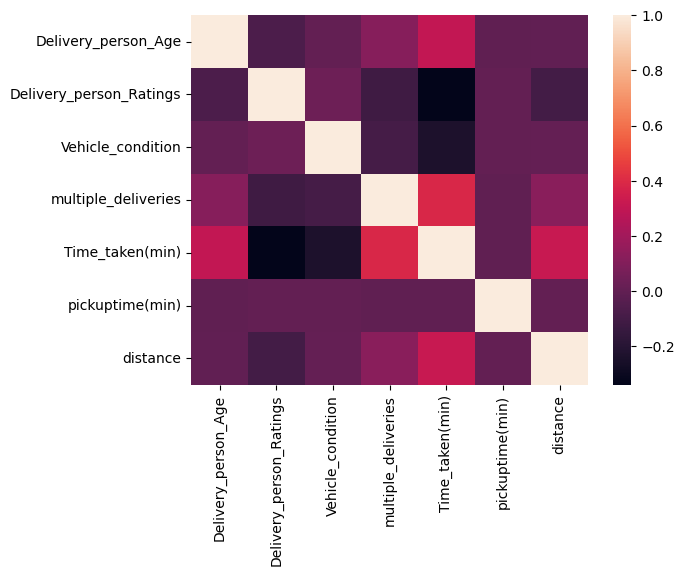

In [74]:
sns.heatmap(data.corr())

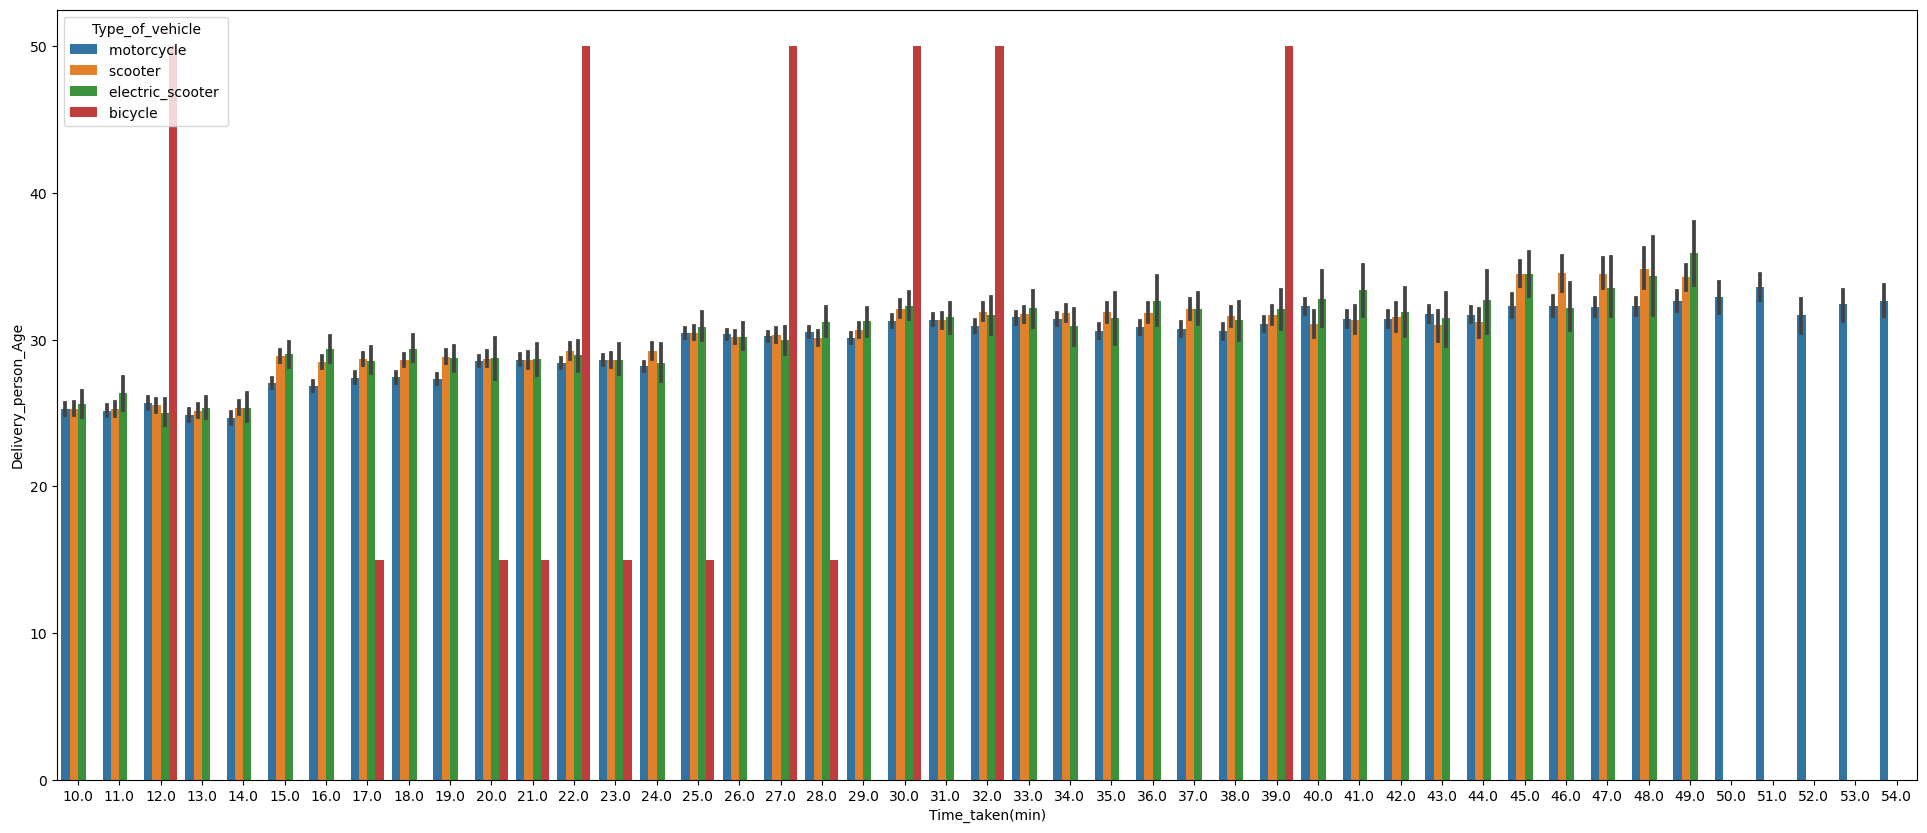

In [75]:
plt.figure(figsize=(24,10))
sns.barplot(hue='Type_of_vehicle',y='Delivery_person_Age',x='Time_taken(min)',data=data)
plt.show()

<AxesSubplot:xlabel='Time_taken(min)', ylabel='Weatherconditions'>

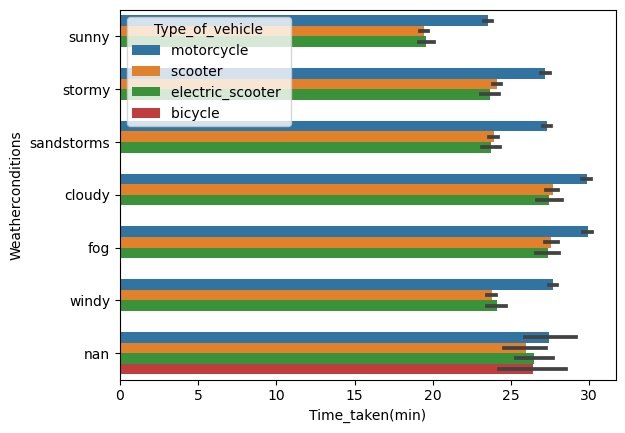

In [76]:
sns.barplot(hue='Type_of_vehicle',y='Weatherconditions',x='Time_taken(min)',data=data)

<AxesSubplot:xlabel='Time_taken(min)', ylabel='Type_of_vehicle'>

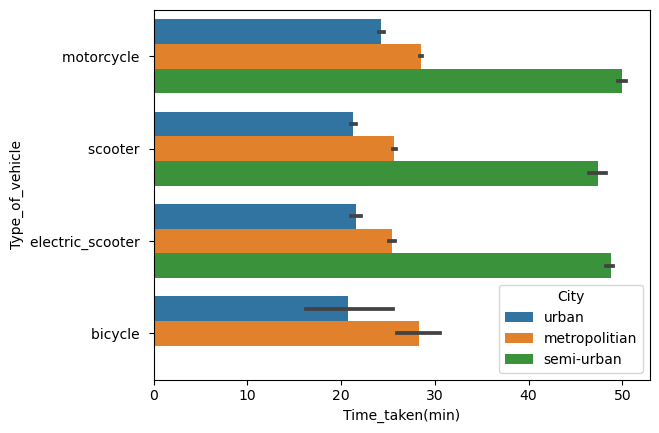

In [77]:
sns.barplot(hue='City',y='Type_of_vehicle',x='Time_taken(min)',data=data)

<AxesSubplot:xlabel='Time_taken(min)', ylabel='Weatherconditions'>

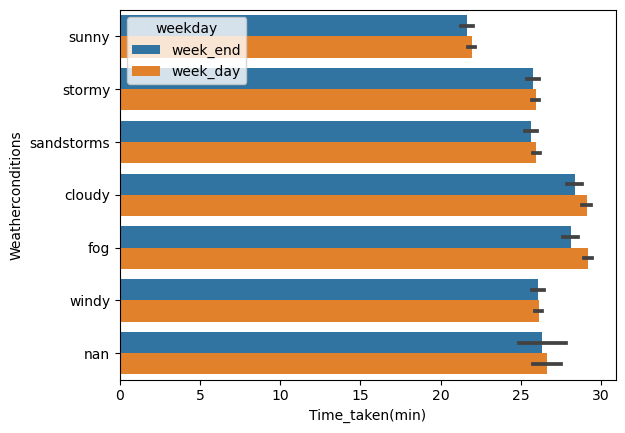

In [78]:
sns.barplot(hue='weekday',x='Time_taken(min)',y='Weatherconditions',data=data)


<Figure size 800x1000 with 0 Axes>

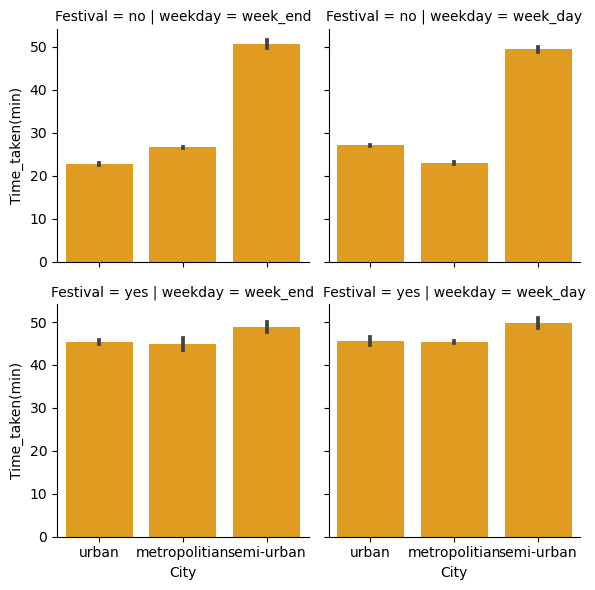

In [79]:
plt.figure(figsize=(8,10))
sm=sns.FacetGrid(data=data,col='weekday',row='Festival')
sm.map(sns.barplot,'City','Time_taken(min)',color='orange')
plt.show()

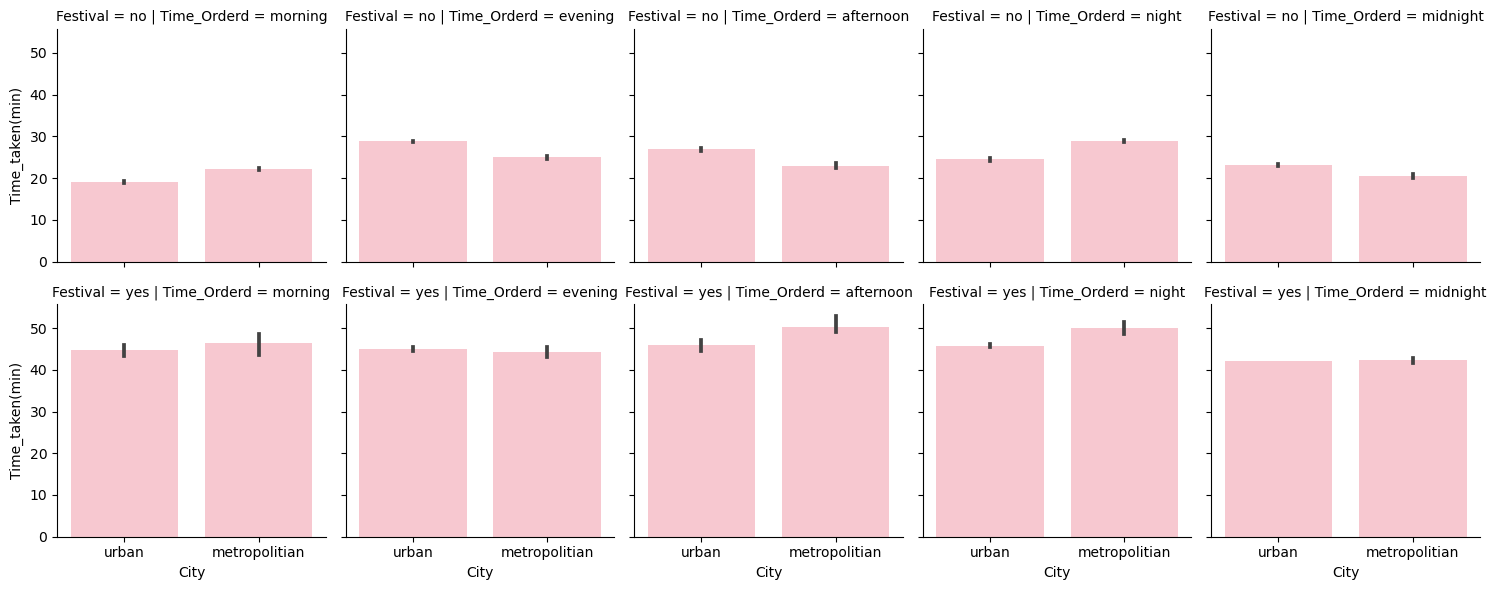

In [80]:
sm=sns.FacetGrid(data=data,col='Time_Orderd',row='Festival')
sm.map(sns.barplot,'City','Time_taken(min)',color='pink')
plt.show()

<Figure size 2500x900 with 0 Axes>

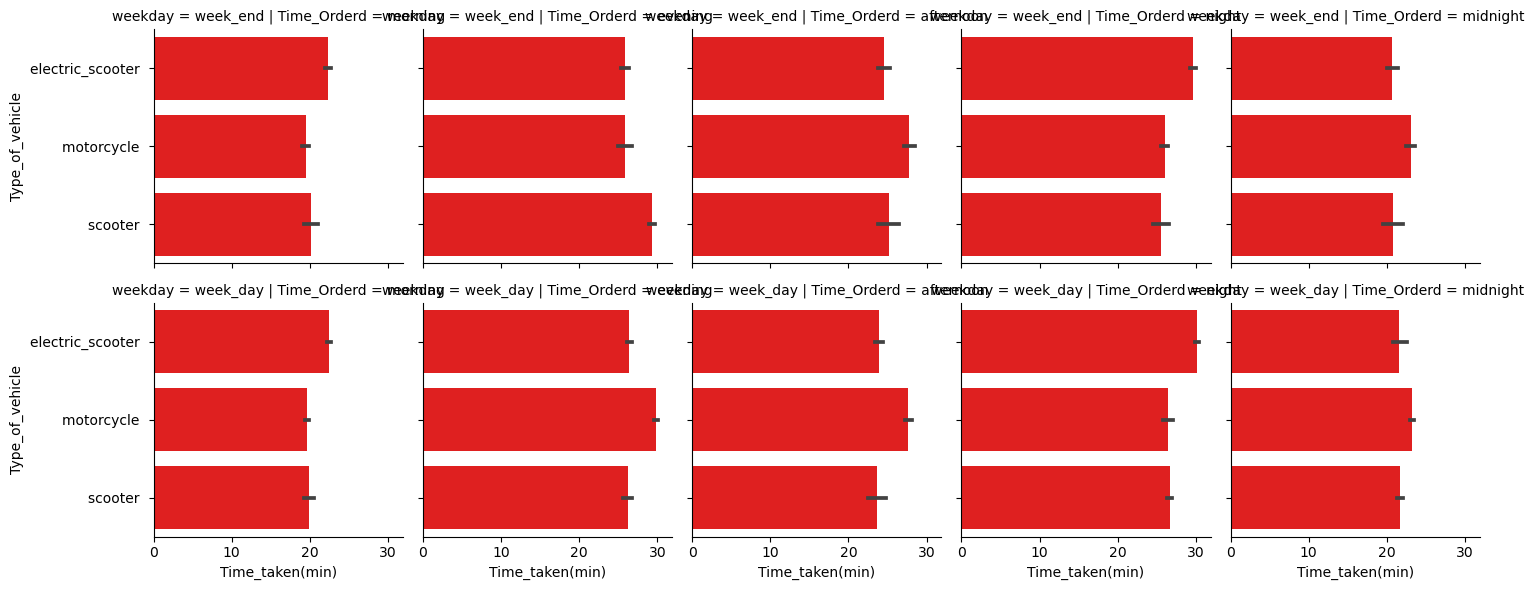

In [81]:
plt.figure(figsize=(25,9))
sm=sns.FacetGrid(data=data,col='Time_Orderd',row='weekday')
sm.map(sns.barplot,'Time_taken(min)','Type_of_vehicle',color='red')
plt.show()

In [82]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),weekday,pickuptime(min),distance
0,37.0,4.9,morning,sunny,high,2,snack,motorcycle,0.0,no,urban,24.0,week_end,15.0,2.460878
1,34.0,4.5,evening,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33.0,week_day,5.0,15.872994
2,23.0,4.4,morning,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26.0,week_end,15.0,1.222049
3,38.0,4.7,evening,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21.0,week_day,10.0,6.141879
4,32.0,4.6,afternoon,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30.0,week_end,15.0,4.799412


**Multivariate analysis**

* Delivery Person's food delivery time depends on age and but not on ratings . Average age 24 of a delivery person can deliver in lowest time when compared to others. 
* Type of snack doesn't depend on the deliverytime .
* Evening Times  with cloudy , fog weather and  person with motorcycle has highest possibility of  late deliveries. 
* City as semi urban takes highest time to delivery , its because of the distance between restaurent and delivery location is to long is semi-urban areas.
* pickup time doesn't depend on deliery time.



**Predictive Modeling - Predictions (AI (ML))**

Input (x) and output(y)

In [83]:
x=data.drop("Time_taken(min)",axis=1)
y=data['Time_taken(min)']

**separation of Training and testing set**

**Dividing Data (x,y) into train and test (Data Validation)**

* for this we will use sklearn module
* we can go with 70,30 or 80,20 or 75,25 ratios

In [84]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=123)

In [85]:
xtrain=xtrain.reset_index(drop=True)
xtest=xtest.reset_index(drop=True)
ytest=ytest.reset_index(drop=True)
ytrain=ytrain.reset_index(drop=True)

In [86]:
xtrain.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,weekday,pickuptime(min),distance
0,24.0,5.0,night,fog,jam,1,meal,motorcycle,1.0,no,metropolitian,week_end,5.0,20.442930
1,NaN,NaN,NaN,sunny,medium,1,drinks,scooter,0.0,no,metropolitian,week_end,NaN,8.065763
2,25.0,4.9,night,sandstorms,jam,0,meal,motorcycle,0.0,no,metropolitian,week_day,5.0,7.280189
3,35.0,4.9,night,sandstorms,low,2,snack,electric_scooter,0.0,no,metropolitian,week_day,15.0,3.640945
4,36.0,5.0,night,windy,low,1,snack,motorcycle,1.0,no,metropolitian,week_day,10.0,9.844352


In [87]:
xtest.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,weekday,pickuptime(min),distance
0,NaN,NaN,NaN,cloudy,low,2,buffet,scooter,1.0,no,metropolitian,week_day,NaN,15.876823
1,28.0,4.9,morning,fog,low,0,snack,motorcycle,1.0,no,metropolitian,week_day,10.0,1.180811
2,23.0,4.8,evening,windy,medium,0,meal,motorcycle,0.0,no,metropolitian,week_end,10.0,15.879113
3,22.0,4.5,evening,windy,medium,2,buffet,scooter,1.0,no,metropolitian,week_day,15.0,6.000187
4,37.0,4.6,morning,cloudy,low,1,meal,scooter,0.0,no,metropolitian,week_day,15.0,2.462165


In [88]:
xtrain.isnull().sum()

Delivery_person_Age        1289
Delivery_person_Ratings    1329
Time_Orderd                1199
Weatherconditions             0
Road_traffic_density        419
Vehicle_condition             0
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries         699
Festival                    148
City                        840
weekday                       0
pickuptime(min)            1199
distance                      0
dtype: int64

In [89]:
xtest.isnull().sum()

Delivery_person_Age        565
Delivery_person_Ratings    579
Time_Orderd                532
Weatherconditions            0
Road_traffic_density       182
Vehicle_condition            0
Type_of_order                0
Type_of_vehicle              0
multiple_deliveries        294
Festival                    80
City                       360
weekday                      0
pickuptime(min)            532
distance                     0
dtype: int64

xtrain, ytrain data is used for the training predictive model

xtest is used for the predictions , ytest is used for the comparissions

**Handling Missing Values & Outliers for xtrain and xtest data**

* In our data we have missing values in y also , in general it will be rare to get missing values in output

Delivery Person Age

<AxesSubplot:xlabel='Delivery_person_Age'>

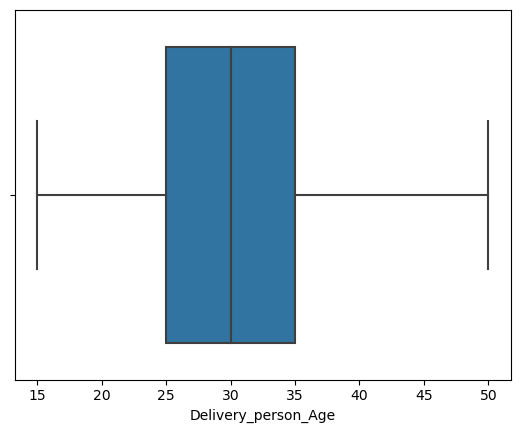

In [90]:
sns.boxplot(xtest['Delivery_person_Age'])

In [91]:
xtrain['Delivery_person_Age'].fillna(int(xtrain['Delivery_person_Age'].mean()),inplace=True)
xtest['Delivery_person_Age'].fillna(int(xtest['Delivery_person_Age'].mean()),inplace=True)


<AxesSubplot:xlabel='Delivery_person_Ratings'>

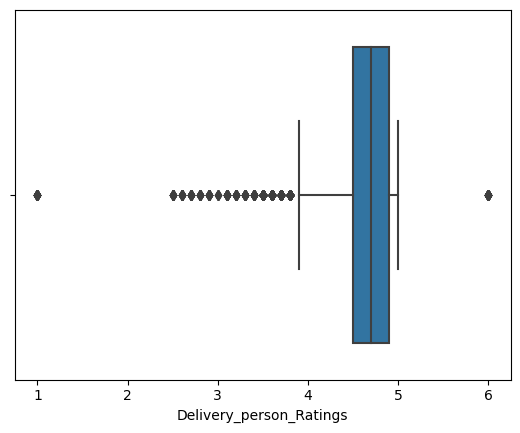

In [92]:
sns.boxplot(xtrain['Delivery_person_Ratings'])

Delivery Person Ratings

In [93]:
xtrain['Delivery_person_Ratings'].fillna(xtrain['Delivery_person_Ratings'].median(),inplace=True)
xtest['Delivery_person_Ratings'].fillna(xtest['Delivery_person_Ratings'].median(),inplace=True)


Time Orderd

In [94]:
xtrain['Time_Orderd'].unique(),xtest['Time_Orderd'].unique()

(array(['night', nan, 'evening', 'morning', 'midnight', 'afternoon'],
       dtype=object),
 array([nan, 'morning', 'evening', 'night', 'afternoon', 'midnight'],
       dtype=object))

In [95]:
xtrain['Time_Orderd'].value_counts()

evening      9829
night        9662
morning      5422
midnight     3499
afternoon    2304
Name: Time_Orderd, dtype: int64

In [96]:
afindx=xtrain[xtrain['Time_Orderd'].isnull()].index[0:867]
midindx=xtrain[xtrain['Time_Orderd'].isnull()].index[867:]


In [97]:
xtrain.loc[afindx,'Time_Orderd'] = xtrain.loc[afindx,'Time_Orderd'].fillna('afternoon')
xtrain.loc[midindx,'Time_Orderd'] = xtrain.loc[midindx,'Time_Orderd'].fillna('midnight')


In [98]:
xtest['Time_Orderd'].value_counts()

evening      4233
night        4139
morning      2296
midnight     1442
afternoon    1036
Name: Time_Orderd, dtype: int64

In [99]:
xtest['Time_Orderd'].fillna("afternoon",inplace=True)

Road TRaffic Density

In [100]:
xtrain['Road_traffic_density'].value_counts(),xtrain['Road_traffic_density'].isnull().sum()

(low       10908
 jam        9884
 medium     7662
 high       3042
 Name: Road_traffic_density, dtype: int64,
 419)

In [101]:
xtrain['Road_traffic_density'].fillna("high",inplace=True)

In [102]:
xtest['Road_traffic_density'].value_counts()

low       4569
jam       4259
medium    3285
high      1383
Name: Road_traffic_density, dtype: int64

In [103]:
xtest['Road_traffic_density'].fillna("high",inplace=True)

Multiple Deliveries

In [104]:
xtrain['multiple_deliveries'].value_counts(), xtest['multiple_deliveries'].value_counts()

(1.0    19726
 0.0     9866
 2.0     1378
 3.0      246
 Name: multiple_deliveries, dtype: int64,
 1.0    8433
 0.0    4229
 2.0     607
 3.0     115
 Name: multiple_deliveries, dtype: int64)

In [105]:
xtrain['multiple_deliveries'].fillna(3.0,inplace=True)
xtest['multiple_deliveries'].fillna(3.0,inplace=True)

Festival

In [106]:
xtrain['Festival'].value_counts(),xtest['Festival'].value_counts()

(no     31143
 yes      624
 Name: Festival, dtype: int64,
 no     13326
 yes      272
 Name: Festival, dtype: int64)

In [107]:
xtrain['Festival'].fillna('yes',inplace=True)
xtest['Festival'].fillna('yes',inplace=True)

City

In [108]:
xtrain['City'].value_counts(),xtest['City'].value_counts()

(metropolitian    23887
 urban             7078
 semi-urban         110
 Name: City, dtype: int64,
 metropolitian    10206
 urban             3058
 semi-urban          54
 Name: City, dtype: int64)

In [109]:
xtrain['City'].fillna("semi-urban",inplace=True)
xtest['City'].fillna("semi-urban",inplace=True)

pickuptime(min)

<AxesSubplot:xlabel='pickuptime(min)'>

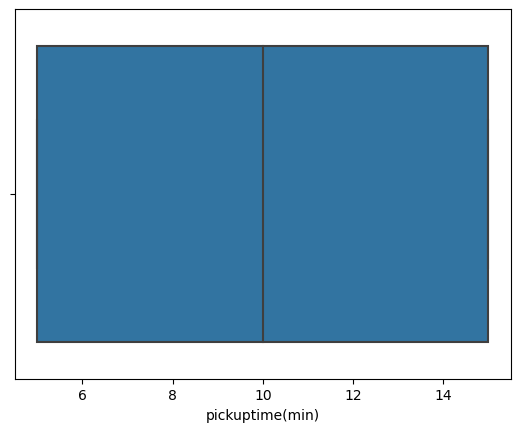

In [110]:
sns.boxplot(xtest['pickuptime(min)'])

In [111]:
xtrain['pickuptime(min)'].fillna(xtrain['pickuptime(min)'].mean(),inplace=True)

In [112]:
xtest['pickuptime(min)'].fillna(xtest['pickuptime(min)'].mean(),inplace=True)

In [113]:
xtrain.isnull().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Time_Orderd                0
Weatherconditions          0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
weekday                    0
pickuptime(min)            0
distance                   0
dtype: int64

In [114]:
xtest.isnull().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Time_Orderd                0
Weatherconditions          0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
weekday                    0
pickuptime(min)            0
distance                   0
dtype: int64

In [115]:
xtrain.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,weekday,pickuptime(min),distance
0,24.0,5.0,night,fog,jam,1,meal,motorcycle,1.0,no,metropolitian,week_end,5.000000,20.442930
1,29.0,4.7,afternoon,sunny,medium,1,drinks,scooter,0.0,no,metropolitian,week_end,10.000977,8.065763
2,25.0,4.9,night,sandstorms,jam,0,meal,motorcycle,0.0,no,metropolitian,week_day,5.000000,7.280189
3,35.0,4.9,night,sandstorms,low,2,snack,electric_scooter,0.0,no,metropolitian,week_day,15.000000,3.640945
4,36.0,5.0,night,windy,low,1,snack,motorcycle,1.0,no,metropolitian,week_day,10.000000,9.844352


In [116]:
xtest.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,weekday,pickuptime(min),distance
0,29.0,4.7,afternoon,cloudy,low,2,buffet,scooter,1.0,no,metropolitian,week_day,9.962346,15.876823
1,28.0,4.9,morning,fog,low,0,snack,motorcycle,1.0,no,metropolitian,week_day,10.000000,1.180811
2,23.0,4.8,evening,windy,medium,0,meal,motorcycle,0.0,no,metropolitian,week_end,10.000000,15.879113
3,22.0,4.5,evening,windy,medium,2,buffet,scooter,1.0,no,metropolitian,week_day,15.000000,6.000187
4,37.0,4.6,morning,cloudy,low,1,meal,scooter,0.0,no,metropolitian,week_day,15.000000,2.462165


In [117]:
xtrain.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,pickuptime(min),distance
count,31915.000000,31915.00000,31915.000000,31915.000000,31915.000000,31915.000000
mean,29.549898,4.63707,1.029986,0.793263,10.000977,7.962784
std,5.694267,0.32898,0.838166,0.654235,4.006559,4.639992
min,15.000000,1.00000,0.000000,0.000000,5.000000,1.125809
25%,25.000000,4.60000,0.000000,0.000000,5.000000,3.757854
50%,29.000000,4.70000,1.000000,1.000000,10.000000,7.420417
75%,34.000000,4.80000,2.000000,1.000000,15.000000,11.045067
max,50.000000,6.00000,3.000000,3.000000,15.000000,20.442930


In [118]:
xtest.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,pickuptime(min),distance
count,13678.000000,13678.000000,13678.000000,13678.000000,13678.000000,13678.000000
mean,29.530487,4.635341,1.007896,0.794999,9.962346,7.948331
std,5.702867,0.325394,0.840985,0.656639,4.015274,4.636168
min,15.000000,1.000000,0.000000,0.000000,5.000000,1.125809
25%,25.000000,4.500000,0.000000,0.000000,5.000000,3.766916
50%,29.000000,4.700000,1.000000,1.000000,10.000000,7.384508
75%,34.000000,4.800000,2.000000,1.000000,15.000000,11.048273
max,50.000000,6.000000,3.000000,3.000000,15.000000,20.442930


**Outliers Handling**

In [119]:
def outlier_detect(df):
    for i in df.describe().columns:
        print("Column:",i)
        print("------------------------------------------------")
        Q1 = df.describe().at['25%',i]
        Q3 = df.describe().at['75%',i]
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        
#         fifth = df[i].quantile(0.05)
#         ninetyfifth = df[i].quantile(0.95)
        
        
        print("Lower Outliers:")
        print()
        lowerout = list(df[df[i]<LTV][i])
        lowerout.sort()
        print(lowerout)
        print()
        # mask method is used to replace the values
        df[i] = df[i].mask(df[i]<LTV, LTV) # replacing the outlier with ltv (25% value)
        
        print("Upper Outliers:")
        print()
        upperout = list(df[df[i]>UTV][i])
        upperout.sort()
        print(upperout) 
        print()
        
        # mask method is used to replace the values
        df[i] = df[i].mask(df[i]>UTV,UTV) # replacing the outlier with utv (75% value)
    return df

In [120]:
outlier_detect(xtest)

Column: Delivery_person_Age
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]

Column: Delivery_person_Ratings
------------------------------------------------
Lower Outliers:

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8, 2.8, 2.9, 2.9, 2.9, 2.9, 2.9, 3.0, 3.0, 3.1, 3.1, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.3, 3.3, 3.3, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,weekday,pickuptime(min),distance
0,29.0,4.7,afternoon,cloudy,low,2,buffet,scooter,1.0,no,metropolitian,week_day,9.962346,15.876823
1,28.0,4.9,morning,fog,low,0,snack,motorcycle,1.0,no,metropolitian,week_day,10.000000,1.180811
2,23.0,4.8,evening,windy,medium,0,meal,motorcycle,0.0,no,metropolitian,week_end,10.000000,15.879113
3,22.0,4.5,evening,windy,medium,2,buffet,scooter,1.0,no,metropolitian,week_day,15.000000,6.000187
4,37.0,4.6,morning,cloudy,low,1,meal,scooter,0.0,no,metropolitian,week_day,15.000000,2.462165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13673,38.0,4.9,evening,cloudy,medium,1,snack,motorcycle,1.0,no,semi-urban,week_end,15.000000,4.909019
13674,33.0,5.0,evening,fog,jam,2,meal,electric_scooter,1.0,no,metropolitian,week_end,10.000000,11.073837
13675,39.0,4.7,night,stormy,jam,1,drinks,scooter,1.0,no,metropolitian,week_day,5.000000,13.494823
13676,28.0,4.7,night,stormy,jam,2,meal,scooter,1.0,no,metropolitian,week_day,5.000000,6.913692


In [121]:
outlier_detect(xtrain)

Column: Delivery_person_Age
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]

Column: Delivery_person_Ratings
------------------------------------------------
Lower Outliers:

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 3.0, 3.0, 3.0, 3.0, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,weekday,pickuptime(min),distance
0,24.0,5.0,night,fog,jam,1,meal,motorcycle,1.0,no,metropolitian,week_end,5.000000,20.442930
1,29.0,4.7,afternoon,sunny,medium,1,drinks,scooter,0.0,no,metropolitian,week_end,10.000977,8.065763
2,25.0,4.9,night,sandstorms,jam,0,meal,motorcycle,0.0,no,metropolitian,week_day,5.000000,7.280189
3,35.0,4.9,night,sandstorms,low,2,snack,electric_scooter,0.0,no,metropolitian,week_day,15.000000,3.640945
4,36.0,5.0,night,windy,low,1,snack,motorcycle,1.0,no,metropolitian,week_day,10.000000,9.844352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31910,20.0,4.8,evening,stormy,medium,1,buffet,scooter,0.0,no,semi-urban,week_day,5.000000,9.872807
31911,27.0,4.7,evening,stormy,medium,1,buffet,motorcycle,1.0,no,metropolitian,week_end,5.000000,8.790456
31912,36.0,4.3,night,windy,jam,2,meal,motorcycle,1.0,no,metropolitian,week_day,10.000000,9.216977
31913,26.0,4.9,evening,windy,medium,2,meal,scooter,1.0,no,metropolitian,week_day,5.000000,5.023436


<AxesSubplot:xlabel='Delivery_person_Ratings'>

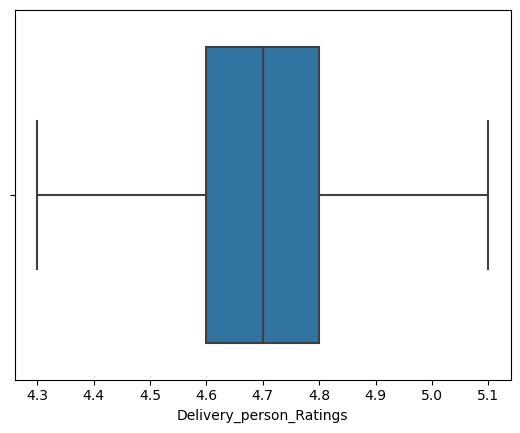

In [122]:
sns.boxplot(xtrain['Delivery_person_Ratings'])

In [123]:
xtrain.isnull().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Time_Orderd                0
Weatherconditions          0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
weekday                    0
pickuptime(min)            0
distance                   0
dtype: int64

In [124]:
xtrain.head()


,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,weekday,pickuptime(min),distance
0,24.0,5.0,night,fog,jam,1,meal,motorcycle,1.0,no,metropolitian,week_end,5.000000,20.442930
1,29.0,4.7,afternoon,sunny,medium,1,drinks,scooter,0.0,no,metropolitian,week_end,10.000977,8.065763
2,25.0,4.9,night,sandstorms,jam,0,meal,motorcycle,0.0,no,metropolitian,week_day,5.000000,7.280189
3,35.0,4.9,night,sandstorms,low,2,snack,electric_scooter,0.0,no,metropolitian,week_day,15.000000,3.640945
4,36.0,5.0,night,windy,low,1,snack,motorcycle,1.0,no,metropolitian,week_day,10.000000,9.844352


In [125]:
xtest.isnull().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Time_Orderd                0
Weatherconditions          0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
weekday                    0
pickuptime(min)            0
distance                   0
dtype: int64

**Preprocessing**

Road_traffic_density

In [126]:
pd.concat([xtrain,ytrain],axis=1).groupby('Road_traffic_density')['Time_taken(min)'].mean()

Road_traffic_density
high      27.044496
jam       31.128895
low       21.305922
medium    26.725529
Name: Time_taken(min), dtype: float64

In [127]:
xtrain.replace({'high':27.08,'jam':31.16,'low':21.29,'medium':26.74},inplace=True)

In [128]:
pd.concat([xtest,ytest],axis=1).groupby('Road_traffic_density')['Time_taken(min)'].mean()

Road_traffic_density
high      27.404473
jam       31.287391
low       21.173999
medium    26.639269
Name: Time_taken(min), dtype: float64

In [129]:
xtest.replace({'high':27.35,'jam':31.21,'low':21.19,'medium':26.56},inplace=True)

City

In [130]:
pd.concat([xtrain,ytrain],axis=1).groupby('City')['Time_taken(min)'].mean()

City
metropolitian    27.309750
semi-urban       25.382105
urban            22.886974
Name: Time_taken(min), dtype: float64

In [131]:
xtrain.replace({'metropolitian':27.32,'semi-urban':25.67,'urban':22.91},inplace=True)


In [132]:
pd.concat([xtest,ytest],axis=1).groupby('City')['Time_taken(min)'].mean()

City
metropolitian    27.328042
semi-urban       25.393720
urban            23.208633
Name: Time_taken(min), dtype: float64

In [133]:
xtest.replace({'metropolitian':27.29,'semi-urban':24.52,'urban':23.18},inplace=True)

Time_Orderd

In [134]:
pd.concat([xtrain,ytrain],axis=1).groupby('Time_Orderd')['Time_taken(min)'].mean()

Time_Orderd
afternoon    26.127720
evening      28.297894
midnight     22.744975
morning      21.204537
night        28.498965
Name: Time_taken(min), dtype: float64

In [135]:
xtrain['Time_Orderd'].replace({'afternoon':26.16,'evening':28.28,'midnight':22.81,'morning':21.24,'night':28.54},inplace=True)

In [136]:
pd.concat([xtest,ytest],axis=1).groupby('Time_Orderd')['Time_taken(min)'].mean()

Time_Orderd
afternoon    26.508291
evening      28.158280
midnight     22.436893
morning      21.442944
night        28.521140
Name: Time_taken(min), dtype: float64

In [137]:
xtest['Time_Orderd'].replace({'afternoon':26.44,'evening':28.15,'midnight':22.41,'morning':21.36,'night':28.37},inplace=True)

In [138]:
xtrain['Festival'].replace({"yes":1,'no':0},inplace=True)
xtest['Festival'].replace({"yes":1,'no':0},inplace=True)


In [139]:
xtrain['weekday'].replace({'week_day':1,'week_end':0},inplace=True)
xtest['weekday'].replace({'week_day':1,'week_end':0},inplace=True)


In [140]:
xtrain.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,weekday,pickuptime(min),distance
0,24.0,5.0,28.54,fog,31.16,1,meal,motorcycle,1.0,0,27.32,0,5.000000,20.442930
1,29.0,4.7,26.16,sunny,26.74,1,drinks,scooter,0.0,0,27.32,0,10.000977,8.065763
2,25.0,4.9,28.54,sandstorms,31.16,0,meal,motorcycle,0.0,0,27.32,1,5.000000,7.280189
3,35.0,4.9,28.54,sandstorms,21.29,2,snack,electric_scooter,0.0,0,27.32,1,15.000000,3.640945
4,36.0,5.0,28.54,windy,21.29,1,snack,motorcycle,1.0,0,27.32,1,10.000000,9.844352


In [141]:
xtest.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,weekday,pickuptime(min),distance
0,29.0,4.7,26.44,cloudy,21.19,2,buffet,scooter,1.0,0,27.29,1,9.962346,15.876823
1,28.0,4.9,21.36,fog,21.19,0,snack,motorcycle,1.0,0,27.29,1,10.000000,1.180811
2,23.0,4.8,28.15,windy,26.56,0,meal,motorcycle,0.0,0,27.29,0,10.000000,15.879113
3,22.0,4.5,28.15,windy,26.56,2,buffet,scooter,1.0,0,27.29,1,15.000000,6.000187
4,37.0,4.6,21.36,cloudy,21.19,1,meal,scooter,0.0,0,27.29,1,15.000000,2.462165


In [142]:
xtrain.isnull().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Time_Orderd                0
Weatherconditions          0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
weekday                    0
pickuptime(min)            0
distance                   0
dtype: int64

In [143]:
xtest.isnull().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Time_Orderd                0
Weatherconditions          0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
weekday                    0
pickuptime(min)            0
distance                   0
dtype: int64

**One hot encoding**

In [144]:
from sklearn.preprocessing import OneHotEncoder

In [145]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=True, drop = 'first')

# drop is used remove one onehotencoded column for dummy_variable trap

In [146]:
ohedata_train = ohe.fit_transform(xtrain[['Weatherconditions','Type_of_order','Type_of_vehicle']]).toarray()
ohedata_test = ohe.transform(xtest[['Weatherconditions','Type_of_order','Type_of_vehicle']]).toarray()

In [147]:
ohedata_train = pd.DataFrame(ohedata_train, columns = ohe.get_feature_names_out())
ohedata_test = pd.DataFrame(ohedata_test, columns = ohe.get_feature_names_out())


In [148]:
xtrain=pd.concat([ohedata_train,xtrain],axis=1)
xtest=pd.concat([ohedata_test,xtest],axis=1)


In [149]:
xtrain=xtrain.reset_index(drop=True)
xtest=xtest.reset_index(drop=True)

In [150]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31915 entries, 0 to 31914
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Weatherconditions_fog              31915 non-null  float64
 1   Weatherconditions_nan              31915 non-null  float64
 2   Weatherconditions_sandstorms       31915 non-null  float64
 3   Weatherconditions_stormy           31915 non-null  float64
 4   Weatherconditions_sunny            31915 non-null  float64
 5   Weatherconditions_windy            31915 non-null  float64
 6   Type_of_order_drinks               31915 non-null  float64
 7   Type_of_order_meal                 31915 non-null  float64
 8   Type_of_order_snack                31915 non-null  float64
 9   Type_of_vehicle_electric_scooter   31915 non-null  float64
 10  Type_of_vehicle_motorcycle         31915 non-null  float64
 11  Type_of_vehicle_scooter            31915 non-null  flo

In [151]:
xtrain=xtrain.drop(['Weatherconditions','Type_of_order','Type_of_vehicle'],axis=1)
xtest=xtest.drop(['Weatherconditions','Type_of_order','Type_of_vehicle'],axis=1)

In [152]:
xtrain.head()


,Weatherconditions_fog,Weatherconditions_nan,Weatherconditions_sandstorms,Weatherconditions_stormy,Weatherconditions_sunny,Weatherconditions_windy,Type_of_order_drinks,Type_of_order_meal,Type_of_order_snack,Type_of_vehicle_electric_scooter,...,Delivery_person_Ratings,Time_Orderd,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,weekday,pickuptime(min),distance
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,28.54,31.16,1,1.0,0,27.32,0,5.000000,20.442930
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4.7,26.16,26.74,1,0.0,0,27.32,0,10.000977,8.065763
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.9,28.54,31.16,0,0.0,0,27.32,1,5.000000,7.280189
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.9,28.54,21.29,2,0.0,0,27.32,1,15.000000,3.640945
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,5.0,28.54,21.29,1,1.0,0,27.32,1,10.000000,9.844352


In [153]:
xtest.head()

,Weatherconditions_fog,Weatherconditions_nan,Weatherconditions_sandstorms,Weatherconditions_stormy,Weatherconditions_sunny,Weatherconditions_windy,Type_of_order_drinks,Type_of_order_meal,Type_of_order_snack,Type_of_vehicle_electric_scooter,...,Delivery_person_Ratings,Time_Orderd,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,weekday,pickuptime(min),distance
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.7,26.44,21.19,2,1.0,0,27.29,1,9.962346,15.876823
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.9,21.36,21.19,0,1.0,0,27.29,1,10.000000,1.180811
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4.8,28.15,26.56,0,0.0,0,27.29,0,10.000000,15.879113
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.5,28.15,26.56,2,1.0,0,27.29,1,15.000000,6.000187
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.6,21.36,21.19,1,0.0,0,27.29,1,15.000000,2.462165


**Importing libraries and defining models**

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [155]:
# Multiple Linear Regression 

mlr = LinearRegression()

# Polynomial Regression

polyfeat = PolynomialFeatures(degree = 2)  # degree is hyperparam

poly = LinearRegression()

# Lasso (L1) & Ridge (L2)

lasso = Lasso(alpha = 5) # alpha - hyperparam - penalty

ridge = Ridge(alpha = 5)

# Random Forest regressor

rf = RandomForestRegressor(n_estimators=50) # n_estimators - hyperparam - number of decision trees

# Xgb

xgb = XGBRegressor()

**Multiple linear regression**

In [156]:
mlr.fit(xtrain, ytrain)

LinearRegression()

In [157]:
ypred=mlr.predict(xtest)

In [158]:
ypred


array([25.80145042, 23.17395873, 26.20822406, ..., 36.04851845,
       26.61508361, 23.32785012])

**Polynomial Regression**

In [159]:
x_train_p = xtrain.iloc[:,12:]
x_test_p = xtest.iloc[:,12:]

In [160]:
# converting x data to poly features

x_train_poly = polyfeat.fit_transform(x_train_p)

x_test_poly = polyfeat.transform(x_test_p)

In [161]:
x_train_poly.shape, x_test_poly.shape

((31915, 78), (13678, 78))

In [162]:
# Model Training

poly.fit(x_train_poly, ytrain)

LinearRegression()

**lasso**

In [163]:
# Model Training

lasso.fit(xtrain,ytrain), ridge.fit(xtrain,ytrain)

(Lasso(alpha=5), Ridge(alpha=5))

In [164]:
# Model params

lasso.intercept_, lasso.coef_

(-1.3655034494982985,
 array([ 0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.32822415, -0.        ,  0.        ,
         0.59777242, -0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.        ,  0.27975473]))

**Ridge**

In [165]:
ridge.intercept_, ridge.coef_

(26.069746389720194,
 array([ 9.41761390e-03,  7.68920689e-01, -2.90455214e+00, -2.80507601e+00,
        -6.19355923e+00, -2.72737138e+00, -1.97114790e-01, -1.20137994e-01,
        -6.37821269e-02, -7.30568178e-01, -1.00789963e+00, -1.50572588e+00,
         4.08659002e-01, -8.98517543e+00, -1.59023147e-01,  8.18018048e-01,
        -2.25613749e+00,  2.42348502e+00,  7.08178752e+00,  5.09015780e-01,
         8.43364962e-02, -7.29373516e-03,  4.19600047e-01]))

In [166]:
# Model Train

rf.fit(xtrain, ytrain)

# n_estimators is the number of trees hyperparam

RandomForestRegressor(n_estimators=50)

**XGB regressor**

In [167]:
# Model Training

xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

**5.9 Model Performance**

* Checking Trained Model Performances on Test Data

* Using x_test data we will be getting predictions, these predictions will be compared to y_test

* To check Model Performance we can use evaluation methods

    * Error/Loss
    * Model Score 
    * Bias-Variance Trade off (Underfit or Overfit)
    * Cross-Val Score

For regression we can use these evaluation


Performance Metric | Regression
-------|-----------
**Loss or Error**|MeanSquaredError/RMSE (For both Train and Test)
**Model Score (Evaluation)** | R2score (Coefficient of Determination)
**Bias-Variance Trade Off**|Higher error & Lower score (underfit)
|Low Train error & High Test error (Overfit)
**Cross-Val Score**|Checking trained model performance on entire X and y data

In [169]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [170]:
names = ['Multiple Linear Regression','Polynomial Regression','Lasso Regression',
        'Ridge Regression','RandomForest Regressor','Xgboost Regressor']

models = {'mlr':mlr, 'poly':poly, 'lasso':lasso, 'ridge':ridge, 'rf':rf, 'xgb':xgb}

In [171]:
trainRMSE = []
testRMSE = []

trainscore = []
testscore = []

fit = []

crossvalscore = []

In [172]:
X = pd.concat([xtrain, xtest], axis = 0)
y = pd.concat([ytrain, ytest], axis = 0)

In [173]:
X.shape, y.shape

((45593, 23), (45593,))

In [174]:
for name, model in models.items():
        
    if name == 'poly':
        
        ptrain = xtrain.iloc[:,12:]
        ptest = xtest.iloc[:,12:]
        
        pftrain = polyfeat.transform(ptrain)
        pftest = polyfeat.transform(ptest)
        
        # RMSE , R2score
        
        trainRMSE.append(np.sqrt(mean_squared_error(ytrain, models[name].predict(pftrain))))
        testRMSE.append(np.sqrt(mean_squared_error(ytest, models[name].predict(pftest))))
        trainscore.append(r2_score(ytrain, models[name].predict(pftrain)))
        testscore.append(r2_score(ytest, models[name].predict(pftest)))
        trscore = r2_score(ytrain, models[name].predict(pftrain))
        tescore = r2_score(ytest, models[name].predict(pftest))
        
        # Bias-Variance Trade off
        
        if trscore<0.50 and tescore<0.50:
            fit.append("Underfit")
        elif trscore>0.70 and tescore<0.60:
            fit.append("Overfit")
        else:
            fit.append("Goodfit")
        
        # Cross validation

        scores = cross_val_score(models[name], X.iloc[:,12:], y, cv=3)
        crossvalscore.append(scores.mean())
        
    else:
        
        # RMSE, R2score

        trainRMSE.append(np.sqrt(mean_squared_error(ytrain, models[name].predict(xtrain))))
        testRMSE.append(np.sqrt(mean_squared_error(ytest, models[name].predict(xtest))))
        trainscore.append(r2_score(ytrain, models[name].predict(xtrain)))
        testscore.append(r2_score(ytest, models[name].predict(xtest)))
        trscore = r2_score(ytrain, models[name].predict(xtrain))
        tescore = r2_score(ytest, models[name].predict(xtest))
        
        # Bias-Variance Trade off
        
        if trscore<0.50 and tescore<0.50:
            fit.append("Underfit")
        elif trscore>0.70 and tescore<0.60:
            fit.append("Overfit")
        else:
            fit.append("Goodfit")

        # Cross-val score
        
        scores = cross_val_score(models[name], X, y, cv=3)
        crossvalscore.append(scores.mean())

In [175]:
trainRMSE

[6.364891499227878,
 6.2201597281580066,
 7.957871157434302,
 6.364915521203404,
 1.5769476685022548,
 3.4570132322694627]

In [176]:
pd.DataFrame({'Model':names, 'Trainedmodel':models.values(), 'TrainRMSE':trainRMSE, 'TestRMSE':testRMSE,
             'Trainscore':trainscore, 'Testscore':testscore, 'Crossvalscore':crossvalscore, 'Fit':fit})

,Model,Trainedmodel,TrainRMSE,TestRMSE,Trainscore,Testscore,Crossvalscore,Fit
0,Multiple Linear Regression,LinearRegression(),6.364891,6.302443,0.538999,0.550975,0.542085,Goodfit
1,Polynomial Regression,LinearRegression(),6.220160,6.827632,0.559726,0.473021,0.491802,Goodfit
2,Lasso Regression,Lasso(alpha=5),7.957871,7.955933,0.279368,0.284457,0.281522,Underfit
3,Ridge Regression,Ridge(alpha=5),6.364916,6.302045,0.538996,0.551031,0.542088,Goodfit
4,RandomForest Regressor,"(DecisionTreeRegressor(max_features='auto', ra...",1.576948,4.144038,0.971702,0.805866,0.802222,Goodfit
5,Xgboost Regressor,"XGBRegressor(base_score=None, booster=None, ca...",3.457013,4.105513,0.864005,0.809459,0.808294,Goodfit


**Better Perfomance Model**

from the above table we can see that **Random Forest** is best model among all.

**Real Life Estimation**

In [177]:
x.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,weekday,pickuptime(min),distance
0,37.0,4.9,morning,sunny,high,2,snack,motorcycle,0.0,no,urban,week_end,15.0,2.460878
1,34.0,4.5,evening,stormy,jam,2,snack,scooter,1.0,no,metropolitian,week_day,5.0,15.872994
2,23.0,4.4,morning,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,week_end,15.0,1.222049
3,38.0,4.7,evening,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,week_day,10.0,6.141879
4,32.0,4.6,afternoon,cloudy,high,1,snack,scooter,1.0,no,metropolitian,week_end,15.0,4.799412


In [178]:
raw = [35,3,'evening','sandstorms','jam',2,'snack','motorcycle',0.0,'no','urban','week_end',10.0,10.2]

In [179]:
print(raw)

[35, 3, 'evening', 'sandstorms', 'jam', 2, 'snack', 'motorcycle', 0.0, 'no', 'urban', 'week_end', 10.0, 10.2]


In [180]:
len(raw)

14

In [181]:
raw = pd.DataFrame([raw], columns = x.columns)

In [182]:
raw

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,weekday,pickuptime(min),distance
0,35,3,evening,sandstorms,jam,2,snack,motorcycle,0.0,no,urban,week_end,10.0,10.2


In [183]:
ohedata = ohe.transform(raw[['Weatherconditions','Type_of_order','Type_of_vehicle']]).toarray()

In [184]:
ohedata = pd.DataFrame(ohedata, columns = ohe.get_feature_names_out())

In [185]:
raw = pd.concat([raw, ohedata], axis = 1)

In [186]:
raw

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,...,Weatherconditions_sandstorms,Weatherconditions_stormy,Weatherconditions_sunny,Weatherconditions_windy,Type_of_order_drinks,Type_of_order_meal,Type_of_order_snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,35,3,evening,sandstorms,jam,2,snack,motorcycle,0.0,no,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
raw=raw.drop(['Weatherconditions','Type_of_order','Type_of_vehicle'],axis=1)

In [188]:
raw

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,weekday,pickuptime(min),...,Weatherconditions_sandstorms,Weatherconditions_stormy,Weatherconditions_sunny,Weatherconditions_windy,Type_of_order_drinks,Type_of_order_meal,Type_of_order_snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,35,3,evening,jam,2,0.0,no,urban,week_end,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
raw.replace({'jam':31.21,'evening':28.15,'no':0,'urban':23.18,'week_end':0},inplace=True)

In [190]:
raw

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,weekday,pickuptime(min),...,Weatherconditions_sandstorms,Weatherconditions_stormy,Weatherconditions_sunny,Weatherconditions_windy,Type_of_order_drinks,Type_of_order_meal,Type_of_order_snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,35,3,28.15,31.21,2,0.0,0,23.18,0,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
rf.predict(raw)[0]

23.58

**Predicted Delivery Time is 23.58 min**